In [1]:
import uproot
import numpy as np
import matplotlib.pyplot as plt
import vector 
import awkward as ak

from tqdm import tqdm


## Pre-selections
There are 3 pre-selections:

1. Trigger level pre-selection

TDW

2. Restripping pre-selection

| Name | Explanation | Value | Unit |
| --- | --- | --- | --- |
| `nbody` | Number of bodies in the decay | 4 | Dimensionless |
| `MinBMass` | Minimum invariant mass of the B+ candidate | 4500.0 | MeV/c^2 |
| `MaxBMass` | Maximum invariant mass of the B+ candidate | 7000.0 | MeV/c^2 |
| `MinBPt` | Minimum transverse momentum of the B+ candidate | 1200.0 | MeV/c |
| `MaxBVertChi2DOF` | Maximum chi-squared per degree of freedom of the B+ candidate vertex | 15.0 | Dimensionless |
| `MinBPVVDChi2` | Minimum flight chi-squared of the B+ candidate | 20.0 | Dimensionless |
| `MaxBPVIPChi2` | Maximum impact parameter chi-squared of the B+ candidate | 12.0 | Dimensionless |
| `MinBPVDIRA` | Minimum direction angle of the B+ candidate | 0.999 | Dimensionless |
| `MaxMass` | Maximum mass of the decay products | 6000.0 | MeV/c^2 |
| `doPi` | Whether to include pions in the decay | True | Boolean |
| `doK` | Whether to include kaons in the decay | True | Boolean |
| `prescale` | Prescale factor for the trigger | 1.0 | Dimensionless |
| `MaxTrLong` | Maximum longitudinal track length | 250 | mm |
| `MinPiPt` | Minimum transverse momentum of the pions | 300.0 | MeV/c |
| `MinPiIPChi2DV` | Minimum impact parameter chi-squared of the pions | 5.0 | Dimensionless |
| `MaxPiChi2` | Maximum chi-squared of the pion tracks | 3.0 | Dimensionless |
| `MinPiPIDK` | Minimum PIDK of the pions | -2.0 | Dimensionless |
| `MinPiPIDp` | Minimum PIDp of the pions | -2.0 | Dimensionless |
| `MaxPiGHP` | Maximum ghost probability of the pions | 0.25 | Dimensionless |
| `MinKPt` | Minimum transverse momentum of the kaons | 200.0 | MeV/c |
| `MinKIPChi2DV` | Minimum impact parameter chi-squared of the kaons | 5.0 | Dimensionless |
| `MaxKChi2` | Maximum chi-squared of the kaon tracks | 3.0 | Dimensionless |
| `MinKPIDPi` | Minimum PIDPi of the kaons | -2.0 | Dimensionless |
| `MinKPIDp` | Minimum PIDp of the kaons | -2.0 | Dimensionless |
| `MaxKGHP` | Maximum ghost probability of the kaons | 0.3 | Dimensionless |
| `MinpPt` | Minimum transverse momentum of the protons | 250.0 | MeV/c |
| `MinpIPChi2DV` | Minimum impact parameter chi-squared of the protons | 5.0 | Dimensionless |
| `MaxpChi2` | Maximum chi-squared of the proton tracks | 3.0 | Dimensionless |
| `MinpPIDPi` | Minimum PIDPi of the protons | -2.0 | Dimensionless |
| `MinpPIDK` | Minimum PIDK of the protons | -2.0 | Dimensionless |
| `MaxpGHP` | Maximum ghost probability of the protons | 0.3 | Dimensionless |
| `MaxLmDeltaM` | Maximum mass difference for the Lambda0 candidates | 18.0 | MeV/c^2 |
| `MinLmPt` | Minimum transverse momentum of the Lambda0 candidates | 400.0 | MeV/c |
| `MaxLmVertChi2DOF` | Maximum chi-squared per degree of freedom of the Lambda0 vertex | 15.0 | Dimensionless |
| `MinLmPVVDChi2` | Minimum flight chi-squared of the Lambda0 candidates | 12.0 | Dimensionless |
| `MinLmIPChi2` | Minimum impact parameter chi-squared of the Lambda0 candidates | 0.0 | Dimensionless |
| `MinLmPrtPt` | Minimum transverse momentum of the protons in the Lambda0 decay | 300.0 | MeV/c |
| `MinLmPiPt` | Minimum transverse momentum of the pions in the Lambda0 decay | 100.0 | MeV/c |
| `MinLmPrtPIDPi` | Minimum PIDPi of the protons in the Lambda0 decay | -3.0 | Dimensionless |
| `MinLmPrtIPChi2` | Minimum impact parameter chi-squared of the protons in the Lambda0 decay | 4.0 | Dimensionless |
| `MinLmPiIPChi2` | Minimum impact parameter chi-squared of the pions in the Lambda0 decay | 4.0 | Dimensionless |
| `MaxLmPrtTrkChi2` | Maximum chi-squared of the proton tracks in the Lambda0 decay | 4.0 | Dimensionless |
| `MaxLmPiTrkChi2` | Maximum chi-squared of the pion tracks in the Lambda0 decay | 4.0 | Dimensionless |

3. Offline pre-selection 

| Name | Explanation | Value | Unit |
| --- | --- | --- | --- |
| `Bu_FDCHI2_OWNPV` | Flight distance chi-squared of the B+ candidate | > 175 | Dimensionless |
| `Delta_Z` | Difference in Z-coordinate between the end vertices of the Lambda0 and B+ particles | > 2.5 | mm |
| `Lp_ProbNNp` | Probability of the Lambda0 proton being a proton according to the neural network | > 0.05 | Dimensionless |
| `p_ProbNNp` | Probability of the proton being a proton according to the neural network | > 0.05 | Dimensionless |
| `prodProbKK` | Product of the probabilities of the kaons being kaons according to the neural network | > 0.05 | Dimensionless |
| `Bu_PT` | Transverse momentum of the B+ candidate | > 3000 | MeV/c |
| `Bu_IPCHI2_OWNPV` | Impact parameter chi-squared of the B+ candidate | < 10 | Dimensionless |
| `Bu_DTF_chi2` | Chi-squared of the decay tree fit for the B+ candidate | < 30 | Dimensionless |

## Loading data

In [15]:
base_path = '/data/home/melashri/BPhysics/Analysis/data/'
magnet_polarities = ['MagDown', 'MagUp']
decay_modes = ['LL', 'DD']

file_paths = [base_path + f'data_2016{magnet}_{decay}_preselected_merged_240102.root' 
              for magnet in magnet_polarities for decay in decay_modes]

arrs = uproot.concatenate([file_path + ':DecayTree;1' for file_path in file_paths])

### LL vs DD


- LL (Long-Long) tracks are those that are reconstructed using hits in the main tracking system of the LHCb detector, 
which includes the Vertex Locator (VELO), the Tracker Turicensis (TT), and the three stations of the Outer Tracker (OT) and Inner Tracker (IT). 
These tracks typically originate from particles that were produced in the primary proton-proton collision, and they provide 
high-resolution measurements of the particle's properties.

- DD (Downstream-Downstream) tracks are those that are reconstructed using hits in the downstream region of the detector, which includes the TT, OT,
 and IT, but not the VELO. These tracks typically originate from particles that were produced in a secondary decay that occurred outside of the VELO.
  The resolution of these tracks is typically worse than that of LL tracks, but they allow for the reconstruction of particles that decay outside of the VELO.





## Variables

In [16]:
## K+ in B+ --> Lambda_bar,p,K+,K-

h1_P   = arrs['h1_P']
h1_PT  = arrs['h1_PT']
h1_PE  = arrs['h1_PE']
h1_PX  = arrs['h1_PX']
h1_PY  = arrs['h1_PY']
h1_PZ  = arrs['h1_PZ']
h1_ID  = arrs["h1_ID"]
h1_PIDK       = arrs['h1_PIDK']
h1_PIDp       = arrs['h1_PIDp']
h1_TRACK_Type = arrs["h1_TRACK_Type"]
h1_IPCHI2_OWNPV = arrs['h1_IPCHI2_OWNPV']   

| Name | Meaning | Dimension |
| --- | --- | --- |
| `h1_P` | Total momentum of the first hadron | MeV/c |
| `h1_PT` | Transverse momentum of the first hadron | MeV/c |
| `h1_PE` | Energy of the first hadron | MeV |
| `h1_PX` | X-component of the momentum of the first hadron | MeV/c |
| `h1_PY` | Y-component of the momentum of the first hadron | MeV/c |
| `h1_PZ` | Z-component of the momentum of the first hadron | MeV/c |
| `h1_ID` | Particle ID of the first hadron | Dimensionless |
| `h1_PIDK` | Probability of the first hadron being a kaon according to the PID algorithm | Dimensionless |
| `h1_PIDp` | Probability of the first hadron being a proton according to the PID algorithm | Dimensionless |
| `h1_TRACK_Type` | Type of the track of the first hadron (LL or DD) | Dimensionless |
| `h1_IPCHI2_OWNPV` | Impact parameter chi-squared of the first hadron | Dimensionless |

In [17]:
## K- in B+ --> Lambda_bar,p,K+,K-

h2_P   = arrs['h2_P']
h2_PT  = arrs['h2_PT']
h2_PE  = arrs['h2_PE']
h2_PX  = arrs['h2_PX']
h2_PY  = arrs['h2_PY']
h2_PZ  = arrs['h2_PZ']
h2_ID  = arrs["h2_ID"]
h2_PIDK       = arrs['h2_PIDK']
h2_PIDp       = arrs['h2_PIDp']
h2_TRACK_Type = arrs["h2_TRACK_Type"]
h2_IPCHI2_OWNPV = arrs['h2_IPCHI2_OWNPV']

| Name | Meaning | Dimension |
| --- | --- | --- |
| `h2_P` | Total momentum of the second hadron | MeV/c |
| `h2_PT` | Transverse momentum of the second hadron | MeV/c |
| `h2_PE` | Energy of the second hadron | MeV |
| `h2_PX` | X-component of the momentum of the second hadron | MeV/c |
| `h2_PY` | Y-component of the momentum of the second hadron | MeV/c |
| `h2_PZ` | Z-component of the momentum of the second hadron | MeV/c |
| `h2_ID` | Particle ID of the second hadron | Dimensionless |
| `h2_PIDK` | Probability of the second hadron being a kaon according to the PID algorithm | Dimensionless |
| `h2_PIDp` | Probability of the second hadron being a proton according to the PID algorithm | Dimensionless |
| `h2_TRACK_Type` | Type of the track of the second hadron (LL or DD) | Dimensionless |
| `h2_IPCHI2_OWNPV` | Impact parameter chi-squared of the second hadron | Dimensionless |

In [18]:
## p in B+ --> Lambda_bar,p,K+,K-

p_P   = arrs['p_P']
p_PT  = arrs['p_PT']
p_PE  = arrs['p_PE']
p_PX  = arrs['p_PX']
p_PY  = arrs['p_PY']
p_PZ  = arrs['p_PZ']
p_ID  = arrs["p_ID"]
p_PIDK       = arrs['p_PIDK']
p_PIDp       = arrs['p_PIDp']
p_TRACK_Type = arrs["p_TRACK_Type"]
p_ProbNNp    = arrs['p_ProbNNp']
p_IPCHI2_OWNPV = arrs['p_IPCHI2_OWNPV']

| Name | Meaning | Dimension |
| --- | --- | --- |
| `p_P` | Total momentum of the proton | MeV/c |
| `p_PT` | Transverse momentum of the proton | MeV/c |
| `p_PE` | Energy of the proton | MeV |
| `p_PX` | X-component of the momentum of the proton | MeV/c |
| `p_PY` | Y-component of the momentum of the proton | MeV/c |
| `p_PZ` | Z-component of the momentum of the proton | MeV/c |
| `p_ID` | Particle ID of the proton | Dimensionless |
| `p_PIDK` | Probability of the proton being a kaon according to the PID algorithm | Dimensionless |
| `p_PIDp` | Probability of the proton being a proton according to the PID algorithm | Dimensionless |
| `p_TRACK_Type` | Type of the track of the proton (LL or DD) | Dimensionless |
| `p_ProbNNp` | Probability of the proton being a proton according to the neural network | Dimensionless |
| `p_IPCHI2_OWNPV` | Impact parameter chi-squared of the proton | Dimensionless |

In [19]:
## proton in the Lambda_bar in B+ --> Lambda_bar,p,K+,K-

Lp_P   = arrs['Lp_P']
Lp_PT  = arrs['Lp_PT']
Lp_PE  = arrs['Lp_PE']
Lp_PX  = arrs['Lp_PX']
Lp_PY  = arrs['Lp_PY']
Lp_PZ  = arrs['Lp_PZ']
Lp_ID  = arrs["Lp_ID"]
Lp_TRACK_Type = arrs["Lp_TRACK_Type"]
Lp_ProbNNp    = arrs['Lp_ProbNNp']
LL = (3 == Lp_TRACK_Type)
DD = (5 == Lp_TRACK_Type)

| Name | Meaning | Dimension |
| --- | --- | --- |
| `Lp_P` | Total momentum of the Lambda0 proton | MeV/c |
| `Lp_PT` | Transverse momentum of the Lambda0 proton | MeV/c |
| `Lp_PE` | Energy of the Lambda0 proton | MeV |
| `Lp_PX` | X-component of the momentum of the Lambda0 proton | MeV/c |
| `Lp_PY` | Y-component of the momentum of the Lambda0 proton | MeV/c |
| `Lp_PZ` | Z-component of the momentum of the Lambda0 proton | MeV/c |
| `Lp_ID` | Particle ID of the Lambda0 proton | Dimensionless |
| `Lp_TRACK_Type` | Type of the track of the Lambda0 proton (LL or DD) | Dimensionless |
| `Lp_ProbNNp` | Probability of the Lambda0 proton being a proton according to the neural network | Dimensionless |
| `LL` | Boolean mask for events where the track type of the Lambda0 proton is Long (LL) | Boolean |
| `DD` | Boolean mask for events where the track type of the Lambda0 proton is Downstream (DD) | Boolean |

In [20]:
## pion in the Lambda_bar in B+ --> Lambda_bar,p,K+,K-

Lpi_P   = arrs['Lpi_P']
Lpi_PT  = arrs['Lpi_PT']
Lpi_PE  = arrs['Lpi_PE']
Lpi_PX  = arrs['Lpi_PX']
Lpi_PY  = arrs['Lpi_PY']
Lpi_PZ  = arrs['Lpi_PZ']
Lpi_ID  = arrs["Lpi_ID"]
Lpi_TRACK_Type = arrs["Lpi_TRACK_Type"]
Lpi_ProbNNpi   = arrs['Lpi_ProbNNpi']

| Name | Meaning | Dimension |
| --- | --- | --- |
| `Lpi_P` | Total momentum of the Lambda0 pion | MeV/c |
| `Lpi_PT` | Transverse momentum of the Lambda0 pion | MeV/c |
| `Lpi_PE` | Energy of the Lambda0 pion | MeV |
| `Lpi_PX` | X-component of the momentum of the Lambda0 pion | MeV/c |
| `Lpi_PY` | Y-component of the momentum of the Lambda0 pion | MeV/c |
| `Lpi_PZ` | Z-component of the momentum of the Lambda0 pion | MeV/c |
| `Lpi_ID` | Particle ID of the Lambda0 pion | Dimensionless |
| `Lpi_TRACK_Type` | Type of the track of the Lambda0 pion (LL or DD) | Dimensionless |
| `Lpi_ProbNNpi` | Probability of the Lambda0 pion being a pion according to the neural network | Dimensionless |

In [21]:
## the Lambda_bar in B+ --> Lambda_bar,p,K+,K-

L0_P   = arrs['L0_P']
L0_PT  = arrs['L0_PT']
L0_PE  = arrs['L0_PE']
L0_PX  = arrs['L0_PX']
L0_PY  = arrs['L0_PY']
L0_PZ  = arrs['L0_PZ']
L0_ID  = arrs["L0_ID"]
L0_MM  = arrs['L0_MM']

| Name | Meaning | Dimension |
| --- | --- | --- |
| `L0_P` | Total momentum of the Lambda0 particle | MeV/c |
| `L0_PT` | Transverse momentum of the Lambda0 particle | MeV/c |
| `L0_PE` | Energy of the Lambda0 particle | MeV |
| `L0_PX` | X-component of the momentum of the Lambda0 particle | MeV/c |
| `L0_PY` | Y-component of the momentum of the Lambda0 particle | MeV/c |
| `L0_PZ` | Z-component of the momentum of the Lambda0 particle | MeV/c |
| `L0_ID` | Particle ID of the Lambda0 particle | Dimensionless |
| `L0_MM` | Invariant mass of the Lambda0 particle | MeV/c^2 |

In [22]:
Bu_FDCHI2_OWNPV = arrs['Bu_FDCHI2_OWNPV']
L0_ENDVERTEX_X    = arrs["L0_ENDVERTEX_X"]
L0_ENDVERTEX_Y    = arrs["L0_ENDVERTEX_Y"]
L0_ENDVERTEX_Z    = arrs["L0_ENDVERTEX_Z"]
L0_ENDVERTEX_XERR = arrs["L0_ENDVERTEX_XERR"]
L0_ENDVERTEX_YERR = arrs["L0_ENDVERTEX_YERR"]
L0_ENDVERTEX_ZERR = arrs["L0_ENDVERTEX_ZERR"]
L0_OWNPV_Z = arrs["L0_OWNPV_Z"]
L0_OWNPV_ZERR = arrs["L0_OWNPV_ZERR"]

L0_FD_OWNPV = arrs["L0_FD_OWNPV"]
L0_FDCHI2_OWNPV = arrs["L0_FDCHI2_OWNPV"]

| Name | Meaning | Dimension |
| --- | --- | --- |
| `Bu_FDCHI2_OWNPV` | Flight distance chi-squared of the B+ particle | Dimensionless |
| `L0_ENDVERTEX_X` | X-coordinate of the end vertex of the Lambda0 particle | mm |
| `L0_ENDVERTEX_Y` | Y-coordinate of the end vertex of the Lambda0 particle | mm |
| `L0_ENDVERTEX_Z` | Z-coordinate of the end vertex of the Lambda0 particle | mm |
| `L0_ENDVERTEX_XERR` | Uncertainty on the X-coordinate of the end vertex of the Lambda0 particle | mm |
| `L0_ENDVERTEX_YERR` | Uncertainty on the Y-coordinate of the end vertex of the Lambda0 particle | mm |
| `L0_ENDVERTEX_ZERR` | Uncertainty on the Z-coordinate of the end vertex of the Lambda0 particle | mm |
| `L0_OWNPV_Z` | Z-coordinate of the Lambda0 particle's own primary vertex | mm |
| `L0_OWNPV_ZERR` | Uncertainty on the Z-coordinate of the Lambda0 particle's own primary vertex | mm |
| `L0_FD_OWNPV` | Flight distance of the Lambda0 particle from its own primary vertex | mm |
| `L0_FDCHI2_OWNPV` | Flight distance chi-squared of the Lambda0 particle from its own primary vertex | Dimensionless |

In [23]:
Bu_ENDVERTEX_X     = arrs["Bu_ENDVERTEX_X"]
Bu_ENDVERTEX_Y     = arrs["Bu_ENDVERTEX_Y"]
Bu_ENDVERTEX_Z     = arrs["Bu_ENDVERTEX_Z"]
Bu_ENDVERTEX_XERR  = arrs["Bu_ENDVERTEX_XERR"]
Bu_ENDVERTEX_YERR  = arrs["Bu_ENDVERTEX_YERR"]
Bu_ENDVERTEX_ZERR  = arrs["Bu_ENDVERTEX_YERR"]
Bu_IPCHI2_OWNPV    = arrs["Bu_IPCHI2_OWNPV"]
Bu_MM              = arrs['Bu_MM']
Bu_MMERR           = arrs['Bu_MMERR']
Bu_ID              = arrs['Bu_ID']
Bu_P               = arrs['Bu_P']
Bu_PT              = arrs['Bu_PT']
Bu_PE              = arrs['Bu_PE']
Bu_PX              = arrs['Bu_PX']
Bu_PY              = arrs['Bu_PY']
Bu_PZ              = arrs['Bu_PZ']

| Name | Meaning | Dimension |
| --- | --- | --- |
| `Bu_ENDVERTEX_X` | X-coordinate of the end vertex of the B+ particle | mm |
| `Bu_ENDVERTEX_Y` | Y-coordinate of the end vertex of the B+ particle | mm |
| `Bu_ENDVERTEX_Z` | Z-coordinate of the end vertex of the B+ particle | mm |
| `Bu_ENDVERTEX_XERR` | Uncertainty on the X-coordinate of the end vertex of the B+ particle | mm |
| `Bu_ENDVERTEX_YERR` | Uncertainty on the Y-coordinate of the end vertex of the B+ particle | mm |
| `Bu_ENDVERTEX_ZERR` | Uncertainty on the Z-coordinate of the end vertex of the B+ particle | mm |
| `Bu_IPCHI2_OWNPV` | Impact parameter chi-squared of the B+ particle | Dimensionless |
| `Bu_MM` | Invariant mass of the B+ particle | MeV/c^2 |
| `Bu_MMERR` | Uncertainty on the invariant mass of the B+ particle | MeV/c^2 |
| `Bu_ID` | Particle ID of the B+ particle | Dimensionless |
| `Bu_P` | Total momentum of the B+ particle | MeV/c |
| `Bu_PT` | Transverse momentum of the B+ particle | MeV/c |
| `Bu_PE` | Energy of the B+ particle | MeV |
| `Bu_PX` | X-component of the momentum of the B+ particle | MeV/c |
| `Bu_PY` | Y-component of the momentum of the B+ particle | MeV/c |
| `Bu_PZ` | Z-component of the momentum of the B+ particle | MeV/c |

In [24]:
Delta_Z = L0_ENDVERTEX_Z - Bu_ENDVERTEX_Z
Delta_X = L0_ENDVERTEX_X - Bu_ENDVERTEX_X
Delta_Y = L0_ENDVERTEX_Y - Bu_ENDVERTEX_Y

| Name | Meaning | Dimension |
| --- | --- | --- |
| `Delta_Z` | Difference in Z-coordinate between the end vertices of the Lambda0 and B+ particles | mm |
| `Delta_X` | Difference in X-coordinate between the end vertices of the Lambda0 and B+ particles | mm |
| `Delta_Y` | Difference in Y-coordinate between the end vertices of the Lambda0 and B+ particles | mm |

In [25]:
Delta_X_ERR = np.sqrt(np.square(Bu_ENDVERTEX_XERR)+np.square(L0_ENDVERTEX_XERR))
Delta_Y_ERR = np.sqrt(np.square(Bu_ENDVERTEX_YERR)+np.square(L0_ENDVERTEX_YERR))
Delta_Z_ERR = np.sqrt(np.square(Bu_ENDVERTEX_ZERR)+np.square(L0_ENDVERTEX_ZERR))

delta_x = np.divide(Delta_X,Delta_X_ERR)
delta_y = np.divide(Delta_Y,Delta_Y_ERR)
delta_z = np.divide(Delta_Z,Delta_Z_ERR)
L0_FD_CHISQ = np.square(delta_x) + np.square(delta_y) + np.square(delta_z)

| Name | Meaning | Dimension |
| --- | --- | --- |
| `Delta_X_ERR` | Uncertainty on the difference in X-coordinate between the end vertices of the Lambda0 and B+ particles | mm |
| `Delta_Y_ERR` | Uncertainty on the difference in Y-coordinate between the end vertices of the Lambda0 and B+ particles | mm |
| `Delta_Z_ERR` | Uncertainty on the difference in Z-coordinate between the end vertices of the Lambda0 and B+ particles | mm |
| `delta_x` | Normalized difference in X-coordinate between the end vertices of the Lambda0 and B+ particles | Dimensionless |
| `delta_y` | Normalized difference in Y-coordinate between the end vertices of the Lambda0 and B+ particles | Dimensionless |
| `delta_z` | Normalized difference in Z-coordinate between the end vertices of the Lambda0 and B+ particles | Dimensionless |
| `L0_FD_CHISQ` | Chi-squared of the flight distance of the Lambda0 particle | Dimensionless |

In [26]:
Bu_DTF_decayLength    = arrs['Bu_DTF_decayLength']
Bu_DTF_decayLengthErr = arrs['Bu_DTF_decayLengthErr']
Bu_DTF_ctau           = arrs['Bu_DTF_ctau']
Bu_DTF_ctauErr        = arrs['Bu_DTF_ctauErr']
Bu_DTF_status         = arrs['Bu_DTF_status']
Bu_DTF_nPV            = arrs['Bu_DTF_nPV']
Bu_DTF_chi2           = arrs['Bu_DTF_chi2']
Bu_DTF_nDOF           = arrs['Bu_DTF_nDOF']
Bu_DTFL0_M            = arrs['Bu_DTFL0_M']
Bu_DTFL0_MERR         = arrs['Bu_DTFL0_MERR']
Bu_DTFL0_ctau         = arrs['Bu_DTFL0_ctau']
Bu_DTFL0_ctauErr      = arrs['Bu_DTFL0_ctauErr']
Bu_DTFL0_chi2         = arrs['Bu_DTFL0_chi2']
Bu_DTFL0_nDOF         = arrs['Bu_DTFL0_nDOF']
Bu_DTFL0_status       = arrs['Bu_DTFL0_status']

Bu_L0Global_TIS                        = arrs['Bu_L0Global_TIS']
Bu_L0HadronDecision_TOS                = arrs['Bu_L0HadronDecision_TOS']
Bu_Hlt1Global_TIS                      = arrs['Bu_Hlt1Global_TIS']
Bu_Hlt1TrackMVADecision_TOS            = arrs['Bu_Hlt1TrackMVADecision_TOS']
Bu_Hlt1TwoTrackMVADecision_TOS         = arrs['Bu_Hlt1TwoTrackMVADecision_TOS']
Bu_Hlt2Topo2BodyDecision_TOS           = arrs['Bu_Hlt2Topo2BodyDecision_TOS']
Bu_Hlt2Topo3BodyDecision_TOS           = arrs['Bu_Hlt2Topo3BodyDecision_TOS']
Bu_Hlt2Topo4BodyDecision_TOS           = arrs['Bu_Hlt2Topo4BodyDecision_TOS']
Bu_Hlt2Topo2BodyBBDTDecision_TOS       = arrs['Bu_Hlt2Topo2BodyBBDTDecision_TOS']
Bu_Hlt2Topo3BodyBBDTDecision_TOS       = arrs['Bu_Hlt2Topo3BodyBBDTDecision_TOS']
Bu_Hlt2Topo4BodyBBDTDecision_TOS       = arrs['Bu_Hlt2Topo4BodyBBDTDecision_TOS']

Those are guesses - to check laters 

| Name | Meaning | Dimension |
| --- | --- | --- |
| `Bu_DTF_decayLength` | Decay length of the B+ particle from the DecayTreeFitter | mm |
| `Bu_DTF_decayLengthErr` | Uncertainty on the decay length of the B+ particle from the DecayTreeFitter | mm |
| `Bu_DTF_ctau` | c*tau of the B+ particle from the DecayTreeFitter | mm |
| `Bu_DTF_ctauErr` | Uncertainty on the c*tau of the B+ particle from the DecayTreeFitter | mm |
| `Bu_DTF_status` | Status of the DecayTreeFitter for the B+ particle | Dimensionless |
| `Bu_DTF_nPV` | Number of primary vertices in the DecayTreeFitter for the B+ particle | Dimensionless |
| `Bu_DTF_chi2` | Chi-squared of the DecayTreeFitter for the B+ particle | Dimensionless |
| `Bu_DTF_nDOF` | Number of degrees of freedom in the DecayTreeFitter for the B+ particle | Dimensionless |
| `Bu_DTFL0_M` | Invariant mass of the Lambda0 particle from the DecayTreeFitter | MeV/c^2 |
| `Bu_DTFL0_MERR` | Uncertainty on the invariant mass of the Lambda0 particle from the DecayTreeFitter | MeV/c^2 |
| `Bu_DTFL0_ctau` | c*tau of the Lambda0 particle from the DecayTreeFitter | mm |
| `Bu_DTFL0_ctauErr` | Uncertainty on the c*tau of the Lambda0 particle from the DecayTreeFitter | mm |
| `Bu_DTFL0_chi2` | Chi-squared of the DecayTreeFitter for the Lambda0 particle | Dimensionless |
| `Bu_DTFL0_nDOF` | Number of degrees of freedom in the DecayTreeFitter for the Lambda0 particle | Dimensionless |
| `Bu_DTFL0_status` | Status of the DecayTreeFitter for the Lambda0 particle | Dimensionless |
| `Bu_L0Global_TIS` | L0 global trigger decision for the B+ particle (Trigger Independent of Signal) | Boolean |
| `Bu_L0HadronDecision_TOS` | L0 hadron trigger decision for the B+ particle (Trigger On Signal) | Boolean |
| `Bu_Hlt1Global_TIS` | Hlt1 global trigger decision for the B+ particle (Trigger Independent of Signal) | Boolean |
| `Bu_Hlt1TrackMVADecision_TOS` | Hlt1 track MVA trigger decision for the B+ particle (Trigger On Signal) | Boolean |
| `Bu_Hlt1TwoTrackMVADecision_TOS` | Hlt1 two-track MVA trigger decision for the B+ particle (Trigger On Signal) | Boolean |
| `Bu_Hlt2Topo2BodyDecision_TOS` | Hlt2 two-body topology trigger decision for the B+ particle (Trigger On Signal) | Boolean |
| `Bu_Hlt2Topo3BodyDecision_TOS` | Hlt2 three-body topology trigger decision for the B+ particle (Trigger On Signal) | Boolean |
| `Bu_Hlt2Topo4BodyDecision_TOS` | Hlt2 four-body topology trigger decision for the B+ particle (Trigger On Signal) | Boolean |
| `Bu_Hlt2Topo2BodyBBDTDecision_TOS` | Hlt2 two-body BBDT topology trigger decision for the B+ particle (Trigger On Signal) | Boolean |
| `Bu_Hlt2Topo3BodyBBDTDecision_TOS` | Hlt2 three-body BBDT topology trigger decision for the B+ particle (Trigger On Signal) | Boolean |
| `Bu_Hlt2Topo4BodyBBDTDecision_TOS` | Hlt2 four-body BBDT topology trigger decision for the B+ particle (Trigger On Signal) | Boolean |


In [94]:
h2_probNNk = arrs['h2_ProbNNk']
h1_probNNk = arrs['h1_ProbNNk']
prodProbKK = np.multiply(h1_probNNk, h2_probNNk)



## Exploration

Lets explore some variables and see the data and apply some cuts 

First question is how many events do we have in the data?

In [107]:
# How many events in the data?
print(f'Number of events: {len(arrs)}', 'events')

Number of events: 1639028 events


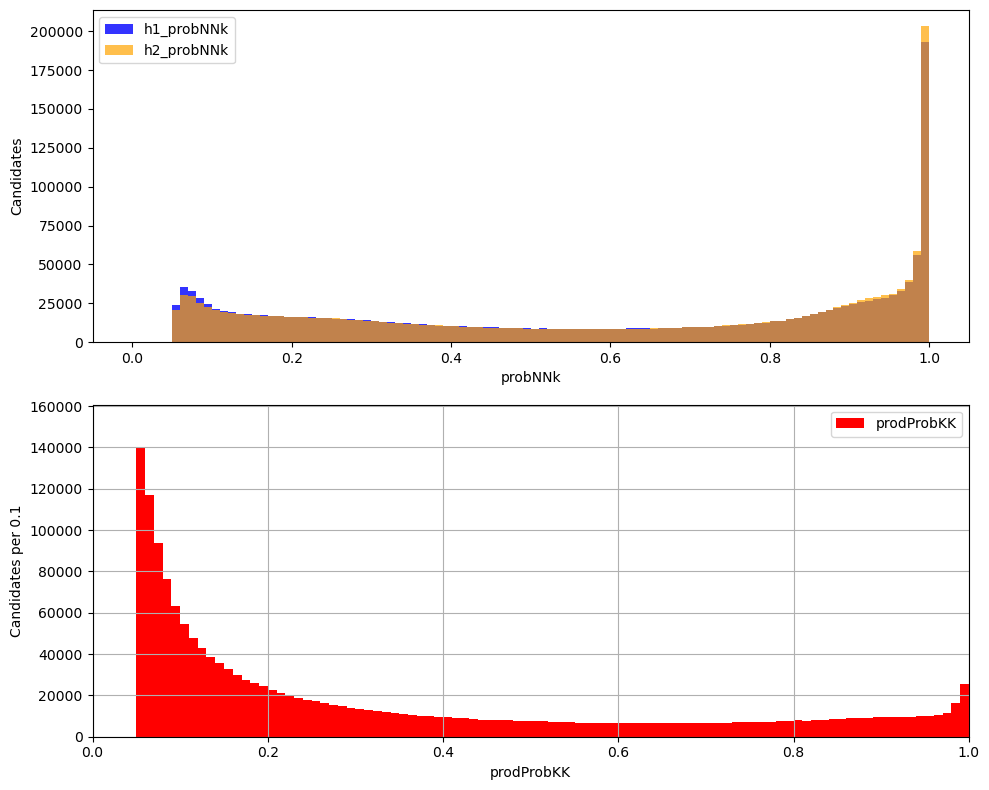

In [105]:
# Create a 2x1 grid of subplots, with the first two histograms on top
fig, axs = plt.subplots(2, 1, figsize=(10, 8))

# First histogram on the first row
axs[0].hist(h1_probNNk, bins=100, range=(0.,1.), color='blue', label='h1_probNNk', alpha=0.8)
axs[0].set_xlabel('probNNk')
axs[0].set_ylabel('Candidates')
axs[0].legend()

# Second histogram on the first row
axs[0].hist(h2_probNNk, bins=100, range=(0.,1.), color='orange', label='h2_probNNk', alpha=0.7)
axs[0].legend()

# Third histogram (product of probabilities) on the second row
nC, bins, patches = axs[1].hist(prodProbKK, bins=100, range=(0.,1.), color='red', label='prodProbKK')
axs[1].set_xlabel('prodProbKK')
axs[1].set_ylabel('Candidates per 0.1')
axs[1].axis([0.,1.,0,1.15*max(nC)])
axs[1].grid(True)
axs[1].legend()

# Adjust the layout so that the subplots fit into the figure area.
plt.tight_layout()
plt.show()

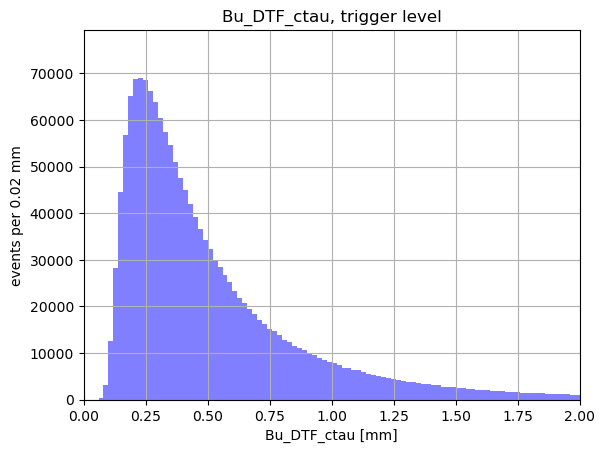

In [91]:
plt.figure()
plt.title("Bu_DTF_ctau, trigger level")
nC, bins, patches = plt.hist(Bu_DTF_ctau,bins=100,range=(0.,2.), color='blue', alpha=0.5, label='Bu_DTF_ctau')
plt.xlabel("Bu_DTF_ctau [mm]")
plt.ylabel("events per 0.02 mm")
plt.axis([0.,2.,0,1.15*max(nC)])
plt.grid(True)

# # Add magnet and datatype to the plot
# magnet_text = f"Magnet: {magnet}"
# decay_text = f"Decay: {decay}"
# plt.annotate(magnet_text, xy=(0.55, 0.95), xycoords='axes fraction', fontsize=8, verticalalignment='top', horizontalalignment='left')
# plt.annotate(decay_text, xy=(0.55, 0.90), xycoords='axes fraction', fontsize=8, verticalalignment='top', horizontalalignment='left')
# plt.show()

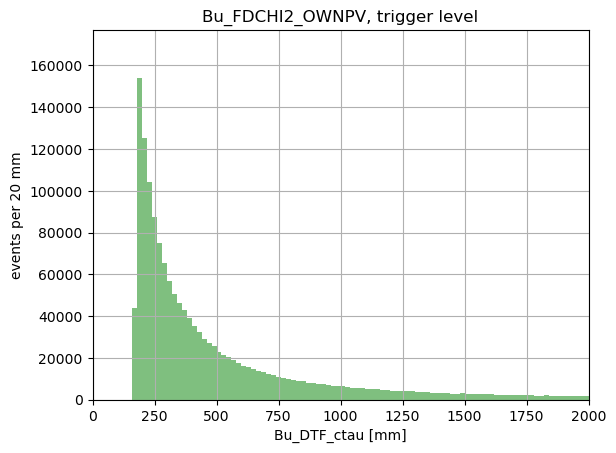

In [57]:
plt.figure()
plt.title("Bu_FDCHI2_OWNPV, trigger level")
nC, bins, patches = plt.hist(Bu_FDCHI2_OWNPV,bins=100,range=(0.,2000.), color='g', alpha=0.5, label='Bu_FDCHI2_OWNPV')
plt.xlabel("Bu_DTF_ctau [mm]")
plt.ylabel("events per 20 mm")
plt.axis([0.,2000.,0,1.15*max(nC)])
plt.grid(True)

# # Add magnet and datatype to the plot
# magnet_text = f"Magnet: {magnet}"
# decay_text = f"Decay: {decay}"
# plt.annotate(magnet_text, xy=(0.55, 0.95), xycoords='axes fraction', fontsize=8, verticalalignment='top', horizontalalignment='left')
# plt.annotate(decay_text, xy=(0.55, 0.90), xycoords='axes fraction', fontsize=8, verticalalignment='top', horizontalalignment='left')
# plt.show()

In [29]:
Bu_DTF_ctau_significance = np.divide(Bu_DTF_ctau,Bu_DTF_ctauErr) # Significance of B+ dec

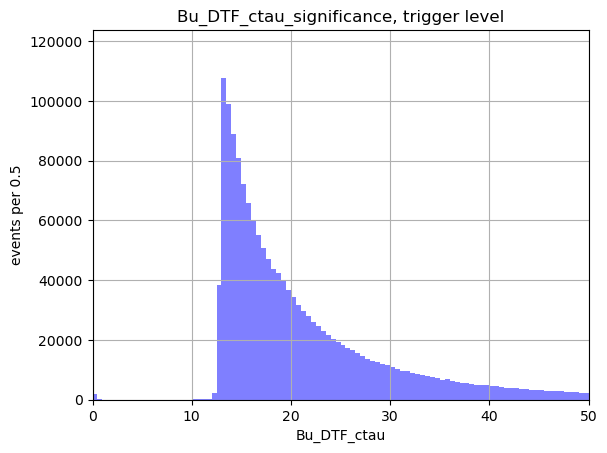

In [54]:
plt.figure()
plt.title("Bu_DTF_ctau_significance, trigger level")
nC, bins, patches = plt.hist(Bu_DTF_ctau_significance,bins=100,range=(0.,50.), color='blue', alpha=0.5, label='Bu_DTF_ctau_significance')
plt.xlabel("Bu_DTF_ctau")
plt.ylabel("events per 0.5")
plt.axis([0.,50.,0,1.15*max(nC)])
plt.grid(True)
# Add magnet and datatype to the plot
# magnet_text = f"Magnet: {magnet}"
# decay_text = f"Decay: {decay}"
# plt.annotate(magnet_text, xy=(0.55, 0.95), xycoords='axes fraction', fontsize=8, verticalalignment='top', horizontalalignment='left')
# plt.annotate(decay_text, xy=(0.55, 0.90), xycoords='axes fraction', fontsize=8, verticalalignment='top', horizontalalignment='left')
# plt.show()

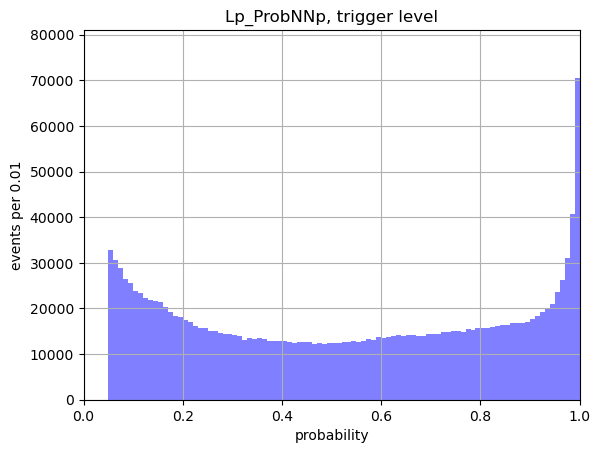

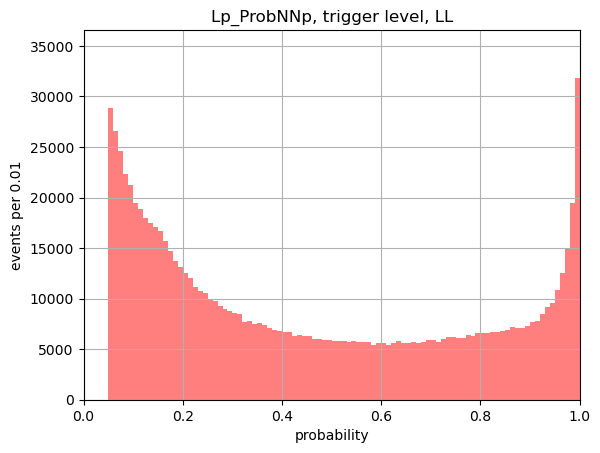

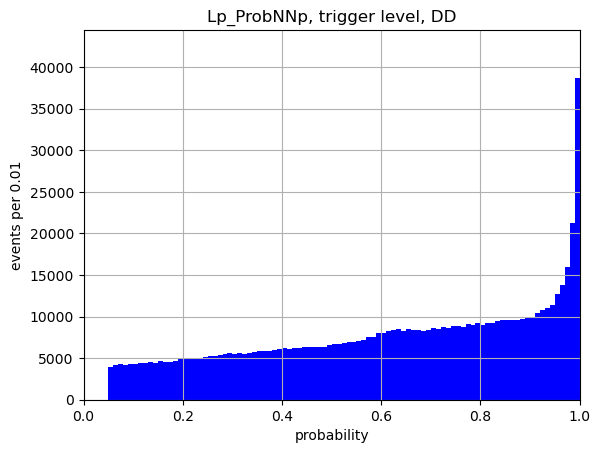

In [60]:
plt.figure()
plt.title("Lp_ProbNNp, trigger level")
nC, bins, patches = plt.hist(Lp_ProbNNp,bins=100,range=(0.,1.), color='b', alpha=0.5)
plt.xlabel("probability")
plt.ylabel("events per 0.01")
plt.axis([0.,1.,0,1.15*max(nC)])
plt.grid(True)
# magnet_text = f"Magnet: {magnet}"
# decay_text = f"Decay: {decay}"
# plt.annotate(magnet_text, xy=(0.55, 0.95), xycoords='axes fraction', fontsize=8, verticalalignment='top', horizontalalignment='left')
# plt.annotate(decay_text, xy=(0.55, 0.90), xycoords='axes fraction', fontsize=8, verticalalignment='top', horizontalalignment='left')

plt.show()

plt.figure()
plt.title("Lp_ProbNNp, trigger level, LL")
nC, bins, patches = plt.hist(Lp_ProbNNp[LL],bins=100,range=(0.,1.), color='r', alpha=0.5, label='LL')
plt.xlabel("probability")
plt.ylabel("events per 0.01")
plt.axis([0.,1.,0,1.15*max(nC)])
plt.grid(True)
# magnet_text = f"Magnet: {magnet}"
# decay_text = f"Decay: {decay}"
# plt.annotate(magnet_text, xy=(0.55, 0.95), xycoords='axes fraction', fontsize=8, verticalalignment='top', horizontalalignment='left')
# plt.annotate(decay_text, xy=(0.55, 0.90), xycoords='axes fraction', fontsize=8, verticalalignment='top', horizontalalignment='left')
plt.show()

plt.figure()
plt.title("Lp_ProbNNp, trigger level, DD")
nC, bins, patches = plt.hist(Lp_ProbNNp[DD],bins=100,range=(0.,1.), color='blue', label='DD')
plt.xlabel("probability")
plt.ylabel("events per 0.01")
plt.axis([0.,1.,0,1.15*max(nC)])
plt.grid(True)
# magnet_text = f"Magnet: {magnet}"
# decay_text = f"Decay: {decay}"
# plt.annotate(magnet_text, xy=(0.55, 0.95), xycoords='axes fraction', fontsize=8, verticalalignment='top', horizontalalignment='left')
# plt.annotate(decay_text, xy=(0.55, 0.90), xycoords='axes fraction', fontsize=8, verticalalignment='top', horizontalalignment='left')
plt.show()


why does the `Lp_ProbNNp` distribution for `LL` and `DD` look different?

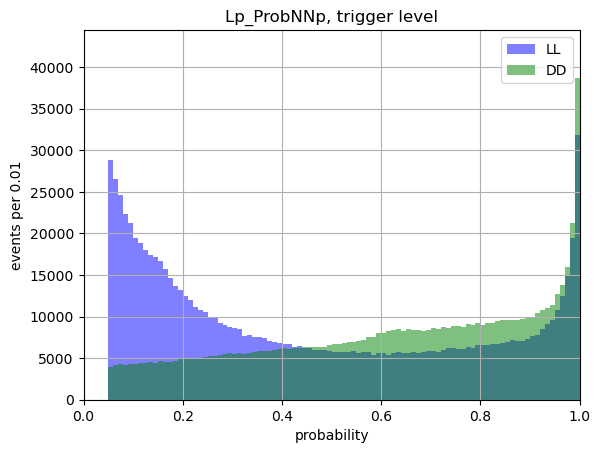

In [38]:
plt.figure()
plt.title("Lp_ProbNNp, trigger level")

# Plot the first histogram for LL
nC_LL, bins_LL, patches_LL = plt.hist(Lp_ProbNNp[LL], bins=100, range=(0.,1.), alpha=0.5, label='LL', color='blue')

# Plot the second histogram for DD
nC_DD, bins_DD, patches_DD = plt.hist(Lp_ProbNNp[DD], bins=100, range=(0.,1.), alpha=0.5, label='DD', color='green')

plt.xlabel("probability")
plt.ylabel("events per 0.01")
plt.axis([0.,1.,0,1.15*max(max(nC_LL), max(nC_DD))])
plt.grid(True)

# Create a legend for the two histograms
plt.legend()

plt.show()

In [50]:
print('Number of L0 = ',len(L0_MM))
print('Number of L0 that is LL = ',len(L0_MM[LL]))
print('Number of L0 that is DD = ',len(L0_MM[DD]))
print('Number of L0 that is neither = ',len(L0_MM[LL & DD]))
print('The percentage of LL = ',len(L0_MM[LL])/len(L0_MM))
print('The percentage of DD = ',len(L0_MM[DD])/len(L0_MM))
print('The percntage ratio of LL to DD = ',(len(L0_MM[LL])/len(L0_MM[DD])) * 100, '%')

Number of L0 =  1639028
Number of L0 that is LL =  906367
Number of L0 that is DD =  732661
Number of L0 that is neither =  0
The percentage of LL =  0.5529905529374727
The percentage of DD =  0.4470094470625273
The percntage ratio of LL to DD =  123.70891858581254 %


There might be a cut for DD sample on p PID (Trigger or Restripping) - To check that. 

## PLay with L0_MM 

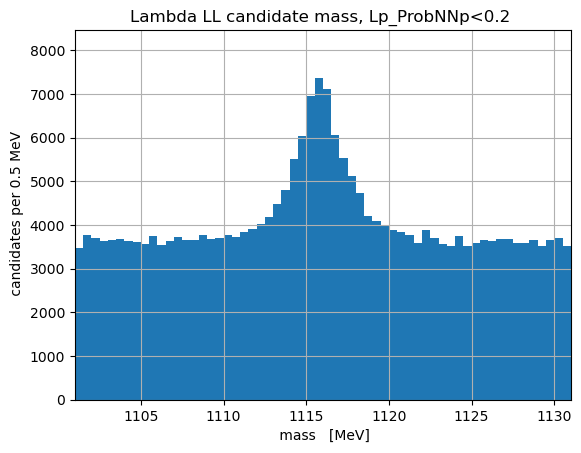

In [62]:
plt.figure()
plt.title("Lambda LL candidate mass, Lp_ProbNNp<0.2 ")
nC, bins, patches = plt.hist(L0_MM[(Lp_ProbNNp<0.2) & LL], bins=60, range=(1101,1131))
plt.xlabel(" mass   [MeV]")
plt.ylabel(" candidates per 0.5 MeV")
plt.axis([1101.,1131.,0,1.15*max(nC)])
plt.grid(True)
plt.show()

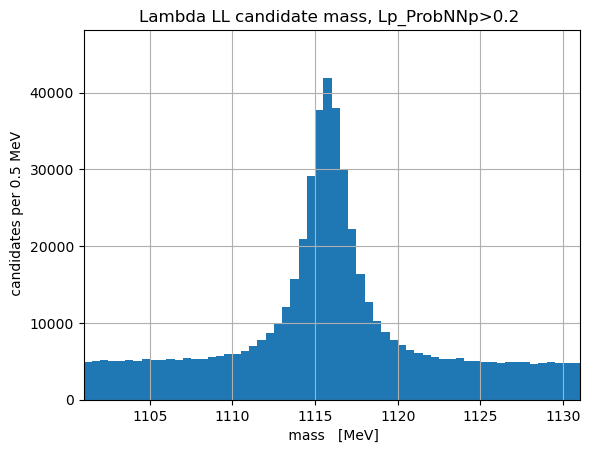

In [63]:
plt.figure()
plt.title("Lambda LL candidate mass, Lp_ProbNNp>0.2 ")
nC, bins, patches =  plt.hist(L0_MM[(Lp_ProbNNp>0.2) & LL], bins=60, range=(1101,1131))
plt.xlabel(" mass   [MeV]")
plt.ylabel(" candidates per 0.5 MeV")
plt.axis([1101.,1131.,0,1.15*max(nC)])
plt.grid(True)
plt.show()

One interesting thing to look into is the The `L0_ENDVERTEX_Z` which is variable that typically represents the z-coordinate of the decay vertex of a `L0`. 
 It is  useful in reconstructing the decay topology of the event and understanding the kinematics of the decay particles.`

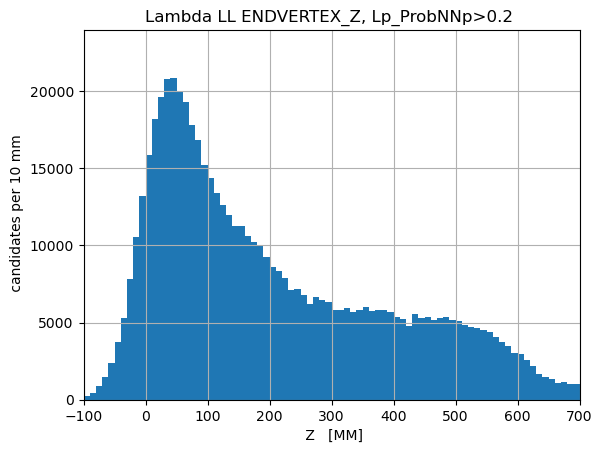

In [66]:
plt.figure()
plt.title("Lambda LL ENDVERTEX_Z, Lp_ProbNNp>0.2 ")
nC, bins, patches =  plt.hist(L0_ENDVERTEX_Z[(Lp_ProbNNp>0.2) & LL], bins=80, range=(-100,700))
plt.xlabel(" Z   [MM]")
plt.ylabel(" candidates per 10 mm")
plt.axis([-100.,700.,0,1.15*max(nC)])
plt.grid(True)
plt.show()

Now lets look into other variables that are related to the `L0` 

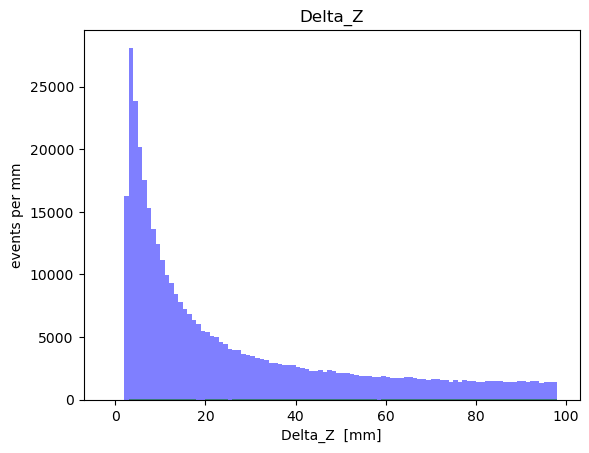

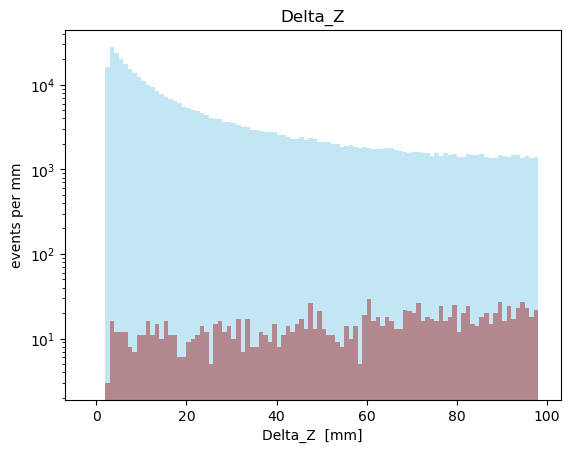

In [72]:
plt.figure()
plt.title("Delta_Z")
plt.hist(Delta_Z[LL], bins=100, range=(-2.,98.), label='LL', color='blue', alpha=0.5)
plt.hist(Delta_Z[DD], bins=100, range=(-2.,98.), label='DD', color='green', alpha=0.5)
plt.xlabel("Delta_Z  [mm]")
plt.ylabel("events per mm")
plt.show()

plt.figure()
plt.title("Delta_Z")
plt.hist(Delta_Z[LL], bins=100, range=(-2.,98.), label='LL', color='skyblue', alpha=0.5)
plt.hist(Delta_Z[DD], bins=100, range=(-2.,98.), label='DD', color='brown', alpha=0.5)
plt.xlabel("Delta_Z  [mm]")
plt.ylabel("events per mm")
plt.yscale('log')
plt.show()




Lets zoom into some specific interesting regions of `Delta_Z` 

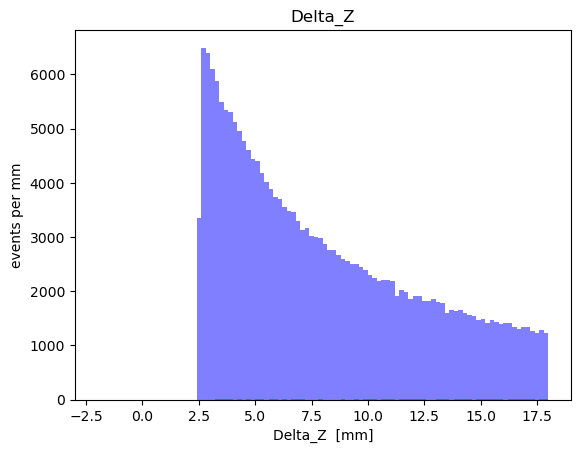

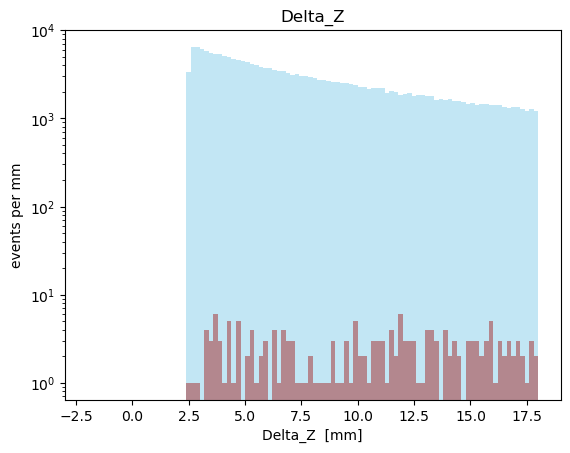

In [73]:
plt.figure()
plt.title("Delta_Z")
plt.hist(Delta_Z[LL], bins=100, range=(-2.,18.), label='LL', color='blue', alpha=0.5)
plt.hist(Delta_Z[DD], bins=100, range=(-2.,18.), label='DD', color='green', alpha=0.5)
plt.xlabel("Delta_Z  [mm]")
plt.ylabel("events per mm")
plt.show()

plt.figure()
plt.title("Delta_Z")
plt.hist(Delta_Z[LL], bins=100, range=(-2.,18.), label='LL', color='skyblue', alpha=0.5)
plt.hist(Delta_Z[DD], bins=100, range=(-2.,18.), label='DD', color='brown', alpha=0.5)
plt.xlabel("Delta_Z  [mm]")
plt.ylabel("events per mm")
plt.yscale('log')
plt.show()




Actually, this is expected as one of pre-selection cuts is `Delta_Z > 2.5`

### Some cuts 

the flight distance chi-squared `L0_FD_CHISQ` is a measure of how well the observed decay matches the expected decay pattern for a L0. 
So `good_Lambda_chisq_9` here means that the `L0_FD_CHISQ` is less than 9. And `good_Lambda_sep_9` means that the apply both `good_Delta_Z` and `good_Lambda_chisq_9` cuts.

In [82]:
good_Delta_Z = Delta_Z>5. 
good_Lambda_chisq_9 = L0_FD_CHISQ>9.
good_Lambda_sep_9 =  good_Delta_Z & good_Lambda_chisq_9
good_Lambda_chisq_25  = L0_FD_CHISQ>25.
good_Lambda_sep_25 =  good_Delta_Z & good_Lambda_chisq_25
good_Lambda_chisq_100  = L0_FD_CHISQ>100.
good_Lambda_sep_100 =  good_Delta_Z & good_Lambda_chisq_100
good_Lambda_chisq_250  = L0_FD_CHISQ>250.
good_Lambda_sep_250 =  good_Delta_Z & good_Lambda_chisq_250


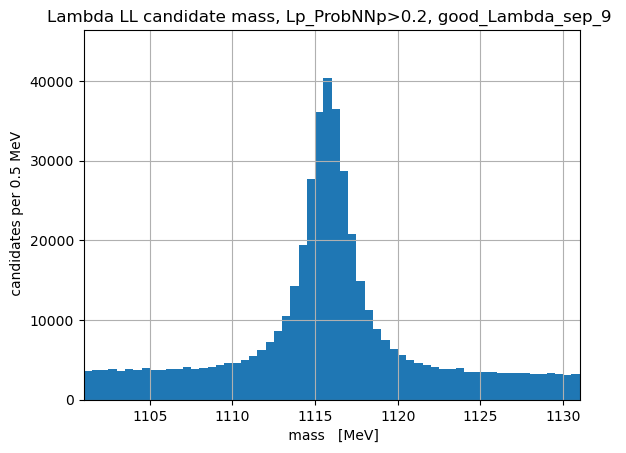

In [83]:

plt.figure()
plt.title("Lambda LL candidate mass, Lp_ProbNNp>0.2, good_Lambda_sep_9 ")
nC, bins, patches = plt.hist(L0_MM[(Lp_ProbNNp>0.2) & LL & good_Lambda_sep_9], bins=60, range=(1101,1131))
plt.xlabel(" mass   [MeV]")
plt.ylabel(" candidates per 0.5 MeV")
plt.axis([1101.,1131.,0,1.15*max(nC)])
plt.grid(True)
plt.show()

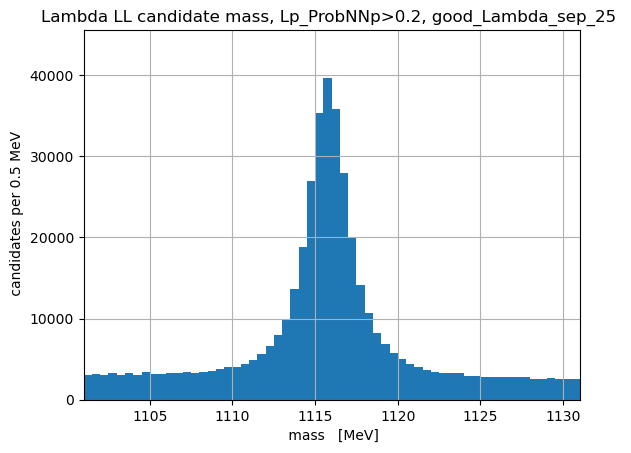

In [84]:
plt.figure()
plt.title("Lambda LL candidate mass, Lp_ProbNNp>0.2, good_Lambda_sep_25 ")
nC, bins, patches = plt.hist(L0_MM[(Lp_ProbNNp>0.2) & LL & good_Lambda_sep_25], bins=60, range=(1101,1131))
plt.xlabel(" mass   [MeV]")
plt.ylabel(" candidates per 0.5 MeV")
plt.axis([1101.,1131.,0,1.15*max(nC)])
plt.grid(True)
plt.show()

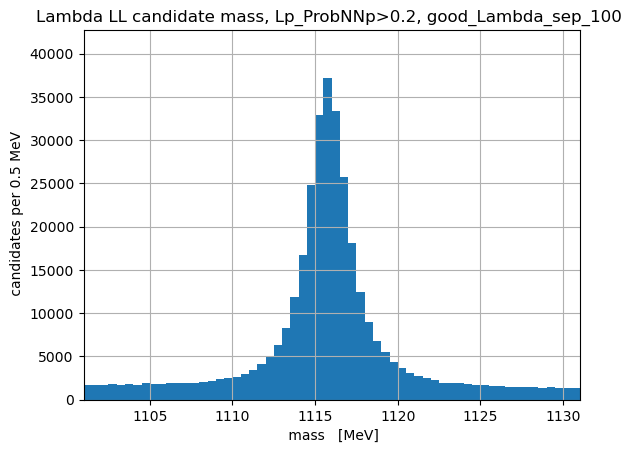

In [85]:
plt.figure()
plt.title("Lambda LL candidate mass, Lp_ProbNNp>0.2, good_Lambda_sep_100 ")
nC, bins, patches = plt.hist(L0_MM[(Lp_ProbNNp>0.2) & LL & good_Lambda_sep_100], bins=60, range=(1101,1131))
plt.xlabel(" mass   [MeV]")
plt.ylabel(" candidates per 0.5 MeV")
plt.axis([1101.,1131.,0,1.15*max(nC)])
plt.grid(True)
plt.show()

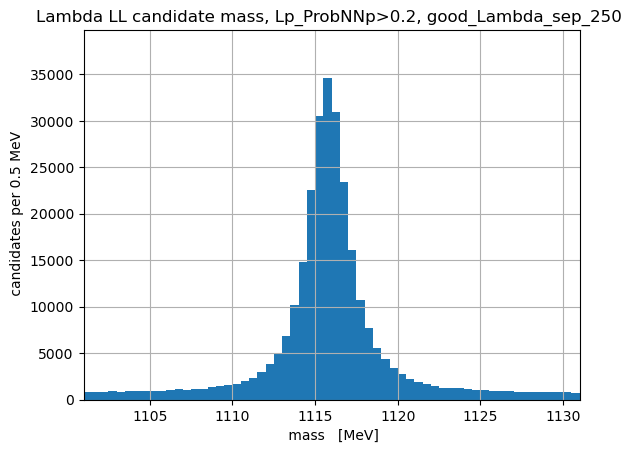

In [86]:
plt.figure()
plt.title("Lambda LL candidate mass, Lp_ProbNNp>0.2, good_Lambda_sep_250 ")
nC, bins, patches = plt.hist(L0_MM[(Lp_ProbNNp>0.2) & LL & good_Lambda_sep_250], bins=60, range=(1101,1131))
plt.xlabel(" mass   [MeV]")
plt.ylabel(" candidates per 0.5 MeV")
plt.axis([1101.,1131.,0,1.15*max(nC)])
plt.grid(True)
plt.show()

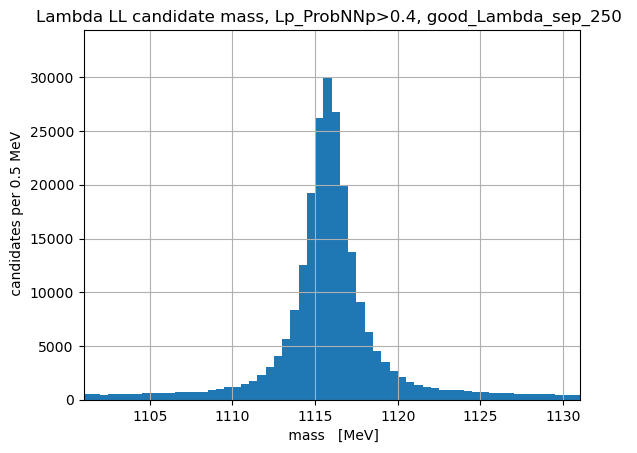

In [88]:
plt.figure()
plt.title("Lambda LL candidate mass, Lp_ProbNNp>0.4, good_Lambda_sep_250 ")
nC, bins, patches = plt.hist(L0_MM[(Lp_ProbNNp>0.4) & LL & good_Lambda_sep_250], bins=60, range=(1101,1131))
plt.xlabel(" mass   [MeV]")
plt.ylabel(" candidates per 0.5 MeV")
plt.axis([1101.,1131.,0,1.15*max(nC)])
plt.grid(True)
plt.show()

Lets see `ENDVERTEX_Z` for `DD` and `LL` individually

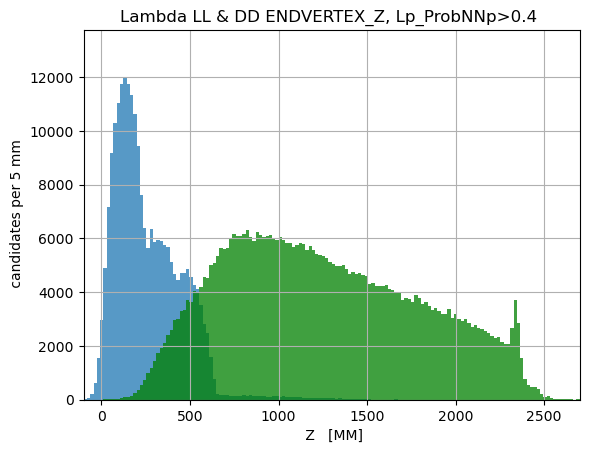

In [90]:
plt.figure()
good_Lambda_mass = (L0_MM>1111) & (L0_MM<1121)
plt.title("Lambda LL & DD ENDVERTEX_Z, Lp_ProbNNp>0.4 ")
nC_LL, bins, patches =  plt.hist(L0_ENDVERTEX_Z[(Lp_ProbNNp>0.4) & LL & good_Lambda_sep_100 & good_Lambda_mass], bins=150, range=(-100,2700), alpha=0.75)
nC_DD, bins, patches =  plt.hist(L0_ENDVERTEX_Z[(Lp_ProbNNp>0.4) & DD & good_Lambda_mass], bins=150, range=(-100.,2700), color='g', alpha=0.75)
plt.xlabel(" Z   [MM]")
plt.ylabel(" candidates per 5 mm")
plt.axis([-100.,2700.,0,1.15*max(nC_LL)])
plt.grid(True)
plt.show()

### Bu_MM

In [121]:
prodProb_0p5 = prodProbKK>0.5
prodProb_0p6 = prodProbKK>0.6
prodProb_0p7 = prodProbKK>0.7
prodProb_0p8 = prodProbKK>0.8
prodProb_0p9 = prodProbKK>0.9
Lambda_corrected_mass = Bu_MM - L0_MM + 1115.5 
tight_cuts =  good_Lambda_sep_100 & (Bu_PT>3500) & (prodProbKK>0.5) & (p_ProbNNp>0.5) & (Bu_FDCHI2_OWNPV>250.) & (Bu_IPCHI2_OWNPV<6)
tight_cuts = tight_cuts & good_Lambda_mass
#tighter_cuts =  good_Lambda_sep_100 & (Bu_PT>2500) & (prodProbKK>0.6) & (p_ProbNNp>0.8) & (Bu_FDCHI2_OWNPV>250.) & (Bu_IPCHI2_OWNPV<8)
#tighter_cuts =  good_Lambda_sep_100 & (Bu_PT>3500) & (prodProbKK>0.5) & (p_ProbNNp>0.5) & (Bu_FDCHI2_OWNPV>250.) & (Bu_IPCHI2_OWNPV<6)
tighter_cuts =  tight_cuts & (Bu_DTF_chi2<40)
tight_but_not_tighter = tight_cuts & np.logical_not(tighter_cuts)



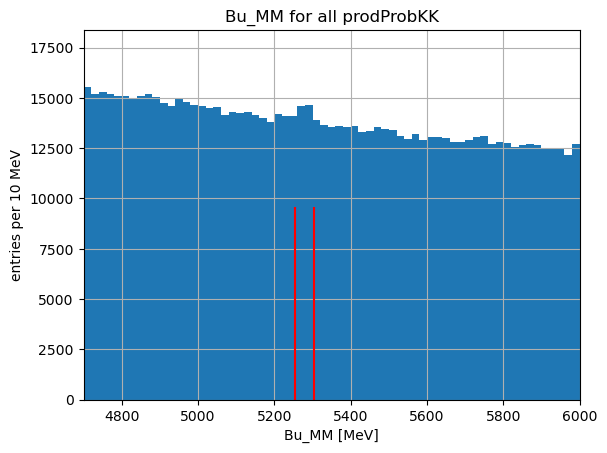

In [113]:
plt.figure()
plt.title('Bu_MM for all prodProbKK')
nC, bins, patches = plt.hist(Bu_MM, bins=100, range=(4500,6500))
plt.xlabel(r'Bu_MM [MeV]')
plt.ylabel('entries per 10 MeV')
plt.axis([4700,6000.,0,1.15*max(nC)])
plt.grid(True)
plt.vlines(5255., 0., 0.6*max(nC), color='red')
plt.vlines(5305., 0., 0.6*max(nC), color='red')
plt.show()

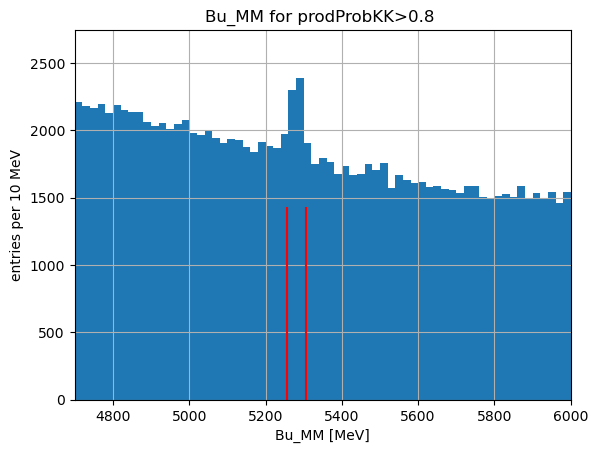

In [115]:
plt.figure()
plt.title('Bu_MM for prodProbKK>0.8 ')
nC, bins, patches = plt.hist(Bu_MM[prodProbKK > 0.8], bins=100, range=(4500,6500))
plt.xlabel(r'Bu_MM [MeV]')
plt.ylabel('entries per 10 MeV')
plt.axis([4700,6000.,0,1.15*max(nC)])
plt.grid(True)
plt.vlines(5255., 0., 0.6*max(nC), color='red')
plt.vlines(5305., 0., 0.6*max(nC), color='red')

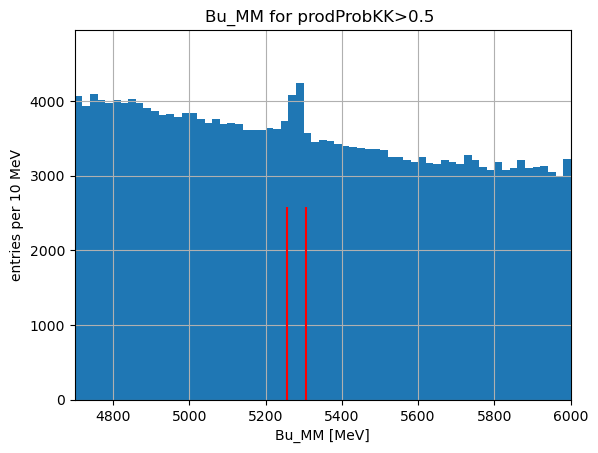

In [116]:
plt.figure()
plt.title('Bu_MM for prodProbKK>0.5 ')
nC, bins, patches = plt.hist(Bu_MM[prodProbKK > 0.5], bins=100, range=(4500,6500))
plt.xlabel(r'Bu_MM [MeV]')
plt.ylabel('entries per 10 MeV')
plt.axis([4700,6000.,0,1.15*max(nC)])
plt.grid(True)
plt.vlines(5255., 0., 0.6*max(nC), color='red')
plt.vlines(5305., 0., 0.6*max(nC), color='red')

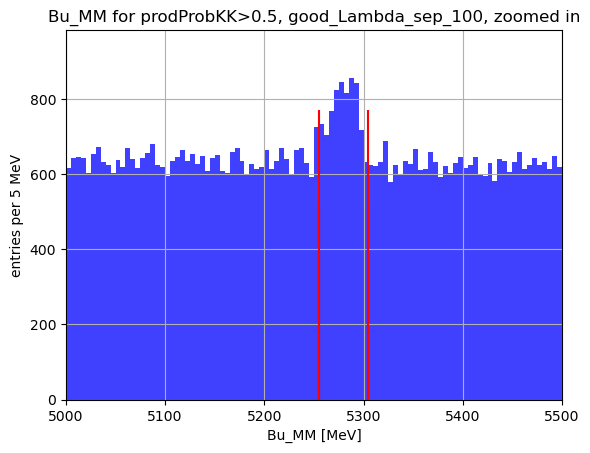

In [123]:
plt.figure()
plt.title('Bu_MM for prodProbKK>0.5, good_Lambda_sep_100, zoomed in')
nC, bins, patches = plt.hist(Lambda_corrected_mass[prodProb_0p5 & good_Lambda_sep_100], bins=100, range=(5000,5500), color='b', alpha = 0.75)
plt.vlines(5305, 0., 0.90*max(nC), color='r')
plt.vlines(5255, 0., 0.90*max(nC), color='r')
plt.xlabel(r'Bu_MM [MeV]')
plt.ylabel('entries per 5 MeV')
plt.axis([5000,5500.,0,1.15*max(nC)])
plt.grid(True)
plt.vlines(5255., 0., 0.6*max(nC), color='red')
plt.vlines(5305., 0., 0.6*max(nC), color='red')
plt.show()

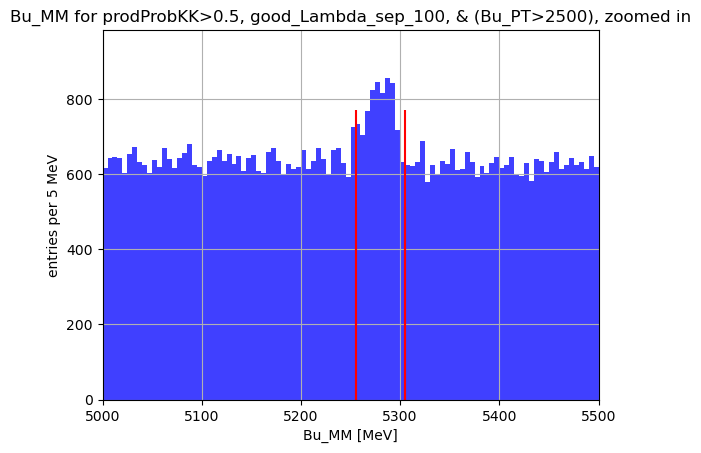

In [125]:
plt.figure()
plt.title('Bu_MM for prodProbKK>0.5, good_Lambda_sep_100, & (Bu_PT>2500), zoomed in')
nC, bins, patches = plt.hist(Lambda_corrected_mass[prodProb_0p5 & good_Lambda_sep_100 & (Bu_PT>2500)], bins=100, range=(5000,5500), color='b', alpha = 0.75)
plt.vlines(5305, 0., 0.90*max(nC), color='r')
plt.vlines(5255, 0., 0.90*max(nC), color='r')
plt.xlabel(r'Bu_MM [MeV]')
plt.ylabel('entries per 5 MeV')
plt.axis([5000,5500.,0,1.15*max(nC)])
plt.grid(True)
plt.vlines(5255., 0., 0.6*max(nC), color='red')
plt.vlines(5305., 0., 0.6*max(nC), color='red')
plt.show()

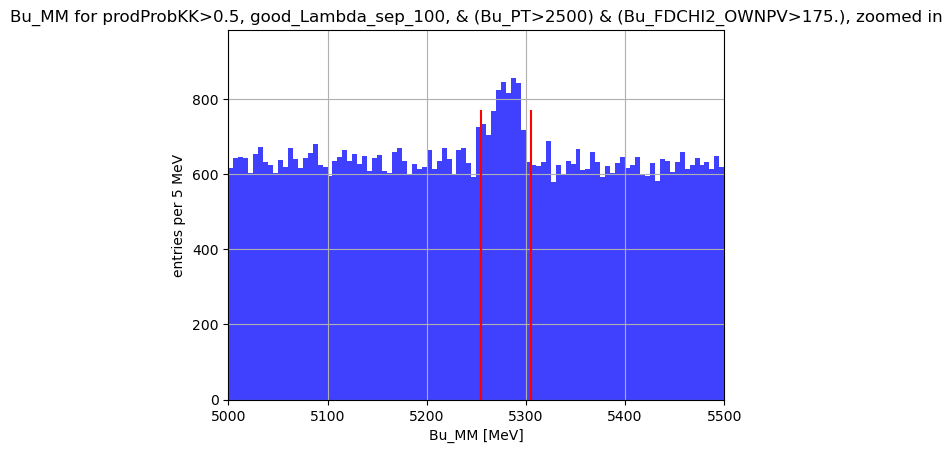

In [128]:

plt.figure()
plt.title('Bu_MM for prodProbKK>0.5, good_Lambda_sep_100, & (Bu_PT>2500) & (Bu_FDCHI2_OWNPV>175.), zoomed in')
nC, bins, patches = plt.hist(Lambda_corrected_mass[prodProb_0p5 & good_Lambda_sep_100 & (Bu_PT>2500) & (Bu_FDCHI2_OWNPV>175.)], bins=100, range=(5000,5500), color='b', alpha = 0.75)
plt.vlines(5305, 0., 0.90*max(nC), color='r')
plt.vlines(5255, 0., 0.90*max(nC), color='r')
plt.xlabel(r'Bu_MM [MeV]')
plt.ylabel('entries per 5 MeV')
plt.axis([5000,5500.,0,1.15*max(nC)])
plt.grid(True)
plt.vlines(5255., 0., 0.6*max(nC), color='red')
plt.vlines(5305., 0., 0.6*max(nC), color='red')
plt.show()

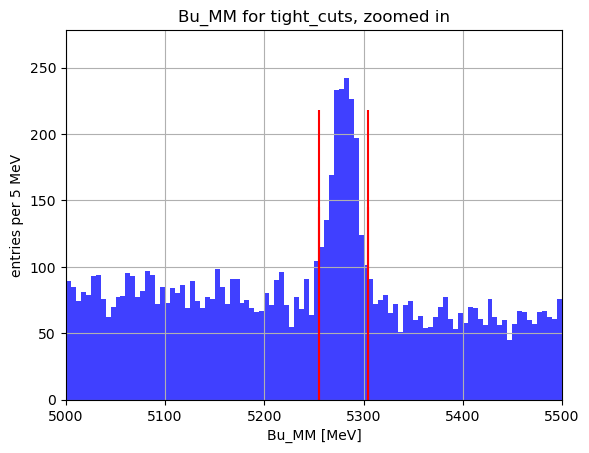

In [196]:
plt.title('Bu_MM for tight_cuts, zoomed in')
nC, bins, patches = plt.hist(Lambda_corrected_mass[tight_cuts], bins=100, range=(5000,5500), color='b', alpha = 0.75)
plt.vlines(5305, 0., 0.90*max(nC), color='r')
plt.vlines(5255, 0., 0.90*max(nC), color='r')
plt.xlabel(r'Bu_MM [MeV]')
plt.ylabel('entries per 5 MeV')
plt.axis([5000,5500.,0,1.15*max(nC)])
plt.grid(True)
plt.vlines(5255., 0., 0.6*max(nC), color='red')
plt.vlines(5305., 0., 0.6*max(nC), color='red')
plt.show()



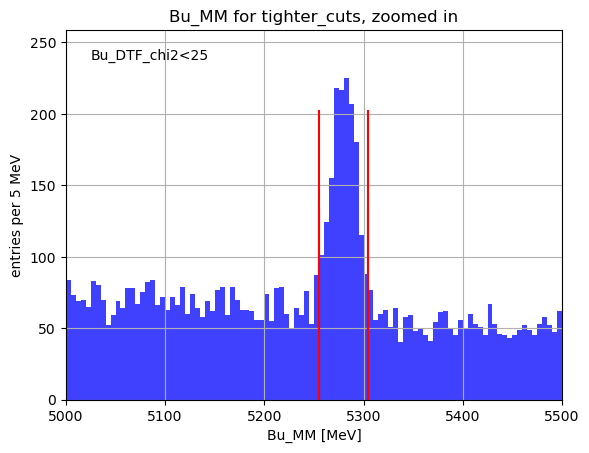

In [197]:
tighter_cuts =  tight_cuts & (Bu_DTF_chi2<25)
plt.title('Bu_MM for tighter_cuts, zoomed in')
nC, bins, patches = plt.hist(Lambda_corrected_mass[tighter_cuts], bins=100, range=(5000,5500), color='b', alpha = 0.75)
plt.vlines(5305, 0., 0.90*max(nC), color='r')
plt.vlines(5255, 0., 0.90*max(nC), color='r')
plt.xlabel(r'Bu_MM [MeV]')
plt.ylabel('entries per 5 MeV')
plt.axis([5000,5500.,0,1.15*max(nC)])
plt.grid(True)
plt.vlines(5255., 0., 0.6*max(nC), color='red')
plt.vlines(5305., 0., 0.6*max(nC), color='red')
plt.annotate('Bu_DTF_chi2<25', xy=(0.05, 0.95), xycoords='axes fraction', fontsize=10, verticalalignment='top', horizontalalignment='left')
plt.show()

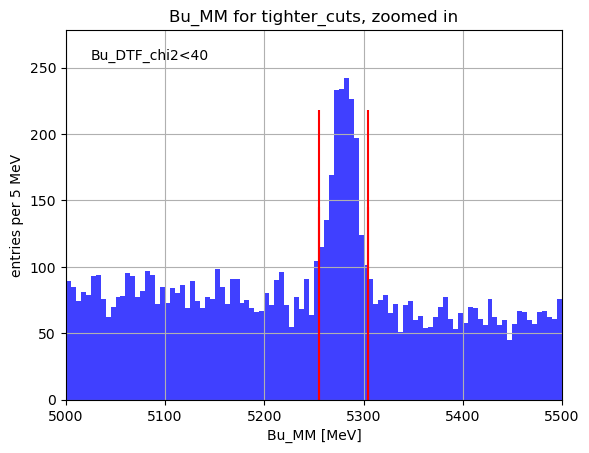

In [198]:
tight_cuts =  good_Lambda_sep_100 & (Bu_PT>3500) & (prodProbKK>0.5) & (p_ProbNNp>0.5) & (Bu_FDCHI2_OWNPV>250.) & (Bu_IPCHI2_OWNPV<6)
tight_cuts = tight_cuts & good_Lambda_mass

tighter_cuts =  tight_cuts & (Bu_DTF_chi2<40)
plt.title('Bu_MM for tighter_cuts, zoomed in')
nC, bins, patches = plt.hist(Lambda_corrected_mass[tighter_cuts], bins=100, range=(5000,5500), color='b', alpha = 0.75)
plt.vlines(5305, 0., 0.90*max(nC), color='r')
plt.vlines(5255, 0., 0.90*max(nC), color='r')
plt.xlabel(r'Bu_MM [MeV]')
plt.ylabel('entries per 5 MeV')
plt.axis([5000,5500.,0,1.15*max(nC)])
plt.grid(True)
plt.vlines(5255., 0., 0.6*max(nC), color='red')
plt.vlines(5305., 0., 0.6*max(nC), color='red')
plt.annotate('Bu_DTF_chi2<40', xy=(0.05, 0.95), xycoords='axes fraction', fontsize=10, verticalalignment='top', horizontalalignment='left')

plt.show()



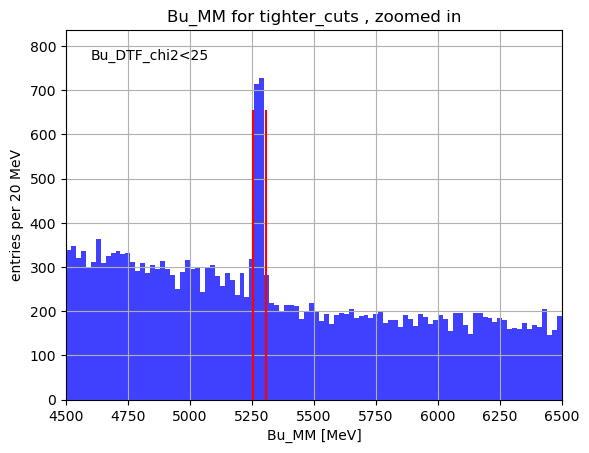

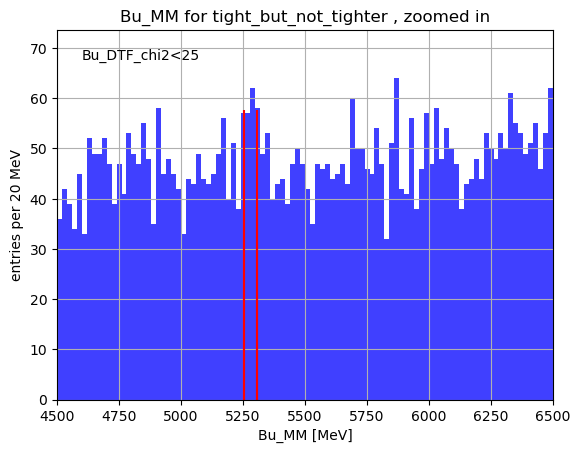

In [146]:
tighter_cuts =  tight_cuts & (Bu_DTF_chi2<25)

plt.title('Bu_MM for tighter_cuts , zoomed in')
nC, bins, patches = plt.hist(Lambda_corrected_mass[tighter_cuts], bins=100, range=(4500,6500), color='b', alpha = 0.75)
plt.vlines(5305, 0., 0.90*max(nC), color='r')
plt.vlines(5255, 0., 0.90*max(nC), color='r')
plt.xlabel(r'Bu_MM [MeV]')
plt.ylabel('entries per 20 MeV')
plt.axis([4500,6500,0,1.15*max(nC)])
plt.grid(True)
plt.vlines(5255., 0., 0.6*max(nC), color='red')
plt.vlines(5305., 0., 0.6*max(nC), color='red')
# add text to include Bu_DTF_chi2<25
plt.annotate('Bu_DTF_chi2<25', xy=(0.05, 0.95), xycoords='axes fraction', fontsize=10, verticalalignment='top', horizontalalignment='left')
plt.show()

tight_but_not_tighter = tight_cuts & np.logical_not(tighter_cuts)
plt.title('Bu_MM for tight_but_not_tighter , zoomed in')
nC, bins, patches = plt.hist(Lambda_corrected_mass[tight_but_not_tighter], bins=100, range=(4500,6500), color='b', alpha = 0.75, label='Bu_DTF_chi2<25')
plt.vlines(5305, 0., 0.90*max(nC), color='r')
plt.vlines(5255, 0., 0.90*max(nC), color='r')
plt.xlabel(r'Bu_MM [MeV]')
plt.ylabel('entries per 20 MeV')
plt.axis([4500,6500.,0,1.15*max(nC)])
plt.grid(True)
plt.vlines(5255., 0., 0.6*max(nC), color='red')
plt.vlines(5305., 0., 0.6*max(nC), color='red')
plt.annotate('Bu_DTF_chi2<25', xy=(0.05, 0.95), xycoords='axes fraction', fontsize=10, verticalalignment='top', horizontalalignment='left')
plt.show()

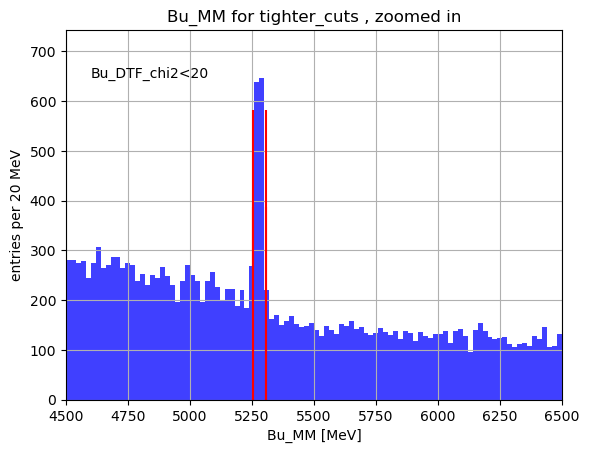

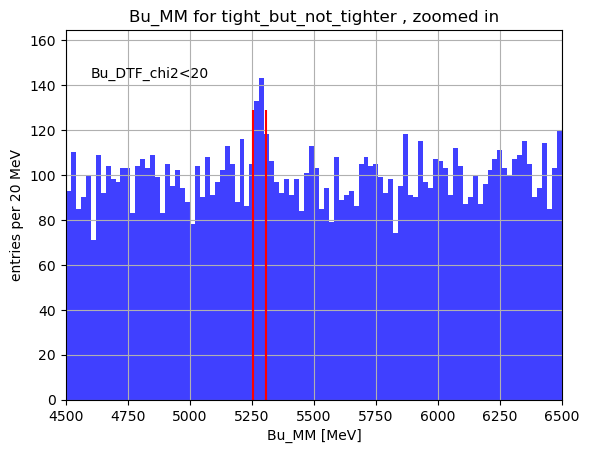

In [199]:
tighter_cuts =  tight_cuts & (Bu_DTF_chi2<20)

plt.title('Bu_MM for tighter_cuts , zoomed in')
nC, bins, patches = plt.hist(Lambda_corrected_mass[tighter_cuts], bins=100, range=(4500,6500), color='b', alpha = 0.75)
plt.vlines(5305, 0., 0.90*max(nC), color='r')
plt.vlines(5255, 0., 0.90*max(nC), color='r')
plt.xlabel(r'Bu_MM [MeV]')
plt.ylabel('entries per 20 MeV')
plt.axis([4500,6500,0,1.15*max(nC)])
plt.grid(True)
plt.vlines(5255., 0., 0.6*max(nC), color='red')
plt.vlines(5305., 0., 0.6*max(nC), color='red')
plt.annotate('Bu_DTF_chi2<20', xy=(0.05, 0.90), xycoords='axes fraction', fontsize=10, verticalalignment='top', horizontalalignment='left')

plt.show()

tight_but_not_tighter = tight_cuts & np.logical_not(tighter_cuts)
plt.title('Bu_MM for tight_but_not_tighter , zoomed in')
nC, bins, patches = plt.hist(Lambda_corrected_mass[tight_but_not_tighter], bins=100, range=(4500,6500), color='b', alpha = 0.75)
plt.vlines(5305, 0., 0.90*max(nC), color='r')
plt.vlines(5255, 0., 0.90*max(nC), color='r')
plt.xlabel(r'Bu_MM [MeV]')
plt.ylabel('entries per 20 MeV')
plt.axis([4500,6500.,0,1.15*max(nC)])
plt.grid(True)
plt.vlines(5255., 0., 0.6*max(nC), color='red')
plt.vlines(5305., 0., 0.6*max(nC), color='red')
plt.annotate('Bu_DTF_chi2<20', xy=(0.05, 0.90), xycoords='axes fraction', fontsize=10, verticalalignment='top', horizontalalignment='left')

plt.show()

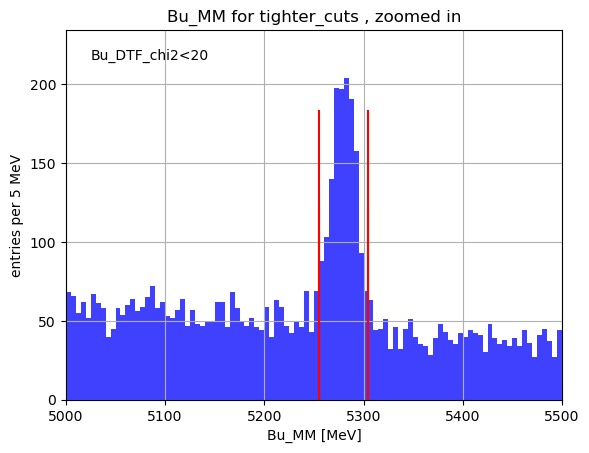

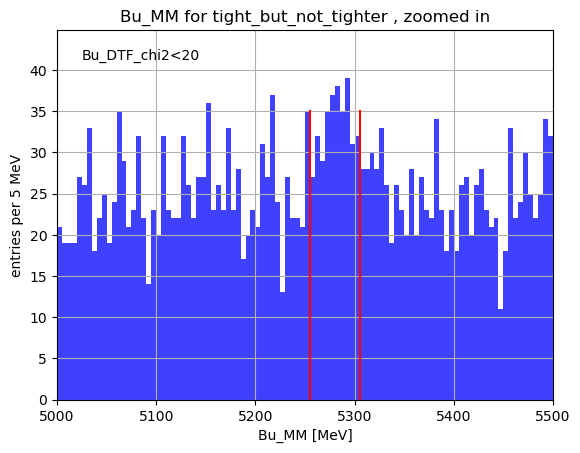

In [200]:
tighter_cuts =  tight_cuts & (Bu_DTF_chi2<20)

plt.title('Bu_MM for tighter_cuts , zoomed in')
nC, bins, patches = plt.hist(Lambda_corrected_mass[tighter_cuts], bins=100, range=(5000,5500), color='b', alpha = 0.75)
plt.vlines(5305, 0., 0.90*max(nC), color='r')
plt.vlines(5255, 0., 0.90*max(nC), color='r')
plt.xlabel(r'Bu_MM [MeV]')
plt.ylabel('entries per 5 MeV')
plt.axis([5000,5500.,0,1.15*max(nC)])
plt.grid(True)
plt.vlines(5255., 0., 0.6*max(nC), color='red')
plt.vlines(5305., 0., 0.6*max(nC), color='red')
plt.annotate('Bu_DTF_chi2<20', xy=(0.05, 0.95), xycoords='axes fraction', fontsize=10, verticalalignment='top', horizontalalignment='left')
plt.show()

tight_but_not_tighter = tight_cuts & np.logical_not(tighter_cuts)
plt.title('Bu_MM for tight_but_not_tighter , zoomed in')
nC, bins, patches = plt.hist(Lambda_corrected_mass[tight_but_not_tighter], bins=100, range=(5000,5500), color='b', alpha = 0.75)
plt.vlines(5305, 0., 0.90*max(nC), color='r')
plt.vlines(5255, 0., 0.90*max(nC), color='r')
plt.xlabel(r'Bu_MM [MeV]')
plt.ylabel('entries per 5 MeV')
plt.axis([5000,5500.,0,1.15*max(nC)])
plt.grid(True)
plt.vlines(5255., 0., 0.6*max(nC), color='red')
plt.vlines(5305., 0., 0.6*max(nC), color='red')
plt.annotate('Bu_DTF_chi2<20', xy=(0.05, 0.95), xycoords='axes fraction', fontsize=10, verticalalignment='top', horizontalalignment='left')
plt.show()

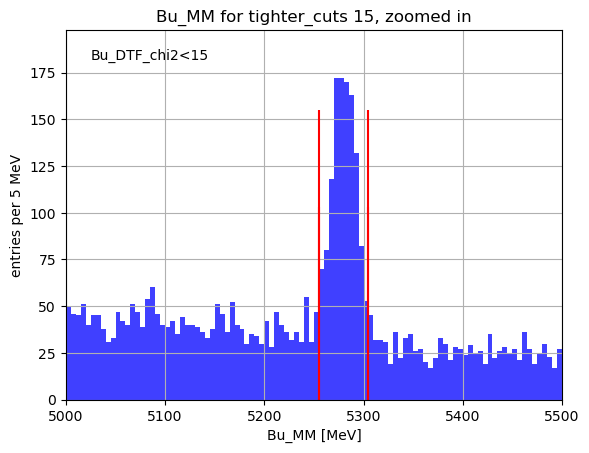

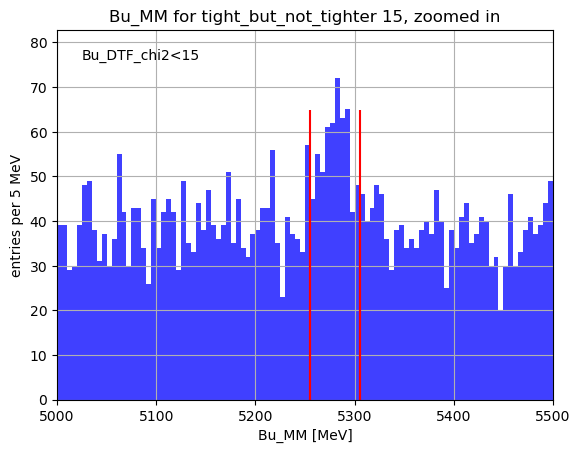

In [150]:
tighter_cuts =  tight_cuts & (Bu_DTF_chi2<15)

plt.title('Bu_MM for tighter_cuts 15, zoomed in')
nC, bins, patches = plt.hist(Lambda_corrected_mass[tighter_cuts], bins=100, range=(5000,5500), color='b', alpha = 0.75)
plt.vlines(5305, 0., 0.90*max(nC), color='r')
plt.vlines(5255, 0., 0.90*max(nC), color='r')
plt.xlabel(r'Bu_MM [MeV]')
plt.ylabel('entries per 5 MeV')
plt.axis([5000,5500.,0,1.15*max(nC)])
plt.grid(True)
plt.vlines(5255., 0., 0.6*max(nC), color='red')
plt.vlines(5305., 0., 0.6*max(nC), color='red')
plt.annotate('Bu_DTF_chi2<15', xy=(0.05, 0.95), xycoords='axes fraction', fontsize=10, verticalalignment='top', horizontalalignment='left')
plt.show()

tight_but_not_tighter = tight_cuts & np.logical_not(tighter_cuts)
plt.title('Bu_MM for tight_but_not_tighter 15, zoomed in')
nC, bins, patches = plt.hist(Lambda_corrected_mass[tight_but_not_tighter], bins=100, range=(5000,5500), color='b', alpha = 0.75)
plt.vlines(5305, 0., 0.90*max(nC), color='r')
plt.vlines(5255, 0., 0.90*max(nC), color='r')
plt.xlabel(r'Bu_MM [MeV]')
plt.ylabel('entries per 5 MeV')
plt.axis([5000,5500.,0,1.15*max(nC)])
plt.grid(True)
plt.vlines(5255., 0., 0.6*max(nC), color='red')
plt.vlines(5305., 0., 0.6*max(nC), color='red')
plt.annotate('Bu_DTF_chi2<15', xy=(0.05, 0.95), xycoords='axes fraction', fontsize=10, verticalalignment='top', horizontalalignment='left')
plt.show()

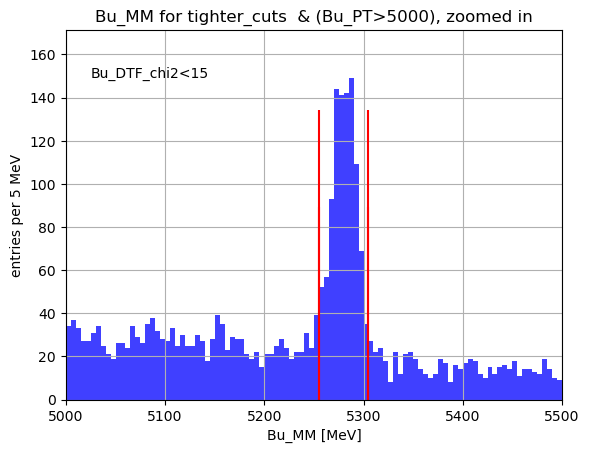

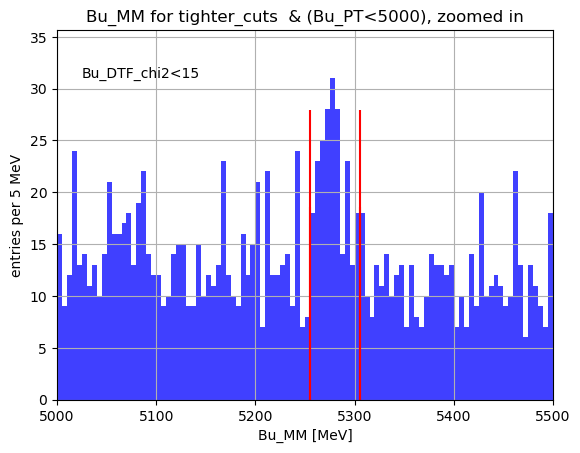

In [157]:
plt.title('Bu_MM for tighter_cuts  & (Bu_PT>5000), zoomed in')
nC, bins, patches = plt.hist(Lambda_corrected_mass[tighter_cuts& (Bu_PT>5000)], bins=100, range=(5000,5500), color='b', alpha = 0.75)
plt.vlines(5305, 0., 0.90*max(nC), color='r')
plt.vlines(5255, 0., 0.90*max(nC), color='r')
plt.xlabel(r'Bu_MM [MeV]')
plt.ylabel('entries per 5 MeV')
plt.axis([5000,5500.,0,1.15*max(nC)])
plt.grid(True)
plt.vlines(5255., 0., 0.6*max(nC), color='red')
plt.vlines(5305., 0., 0.6*max(nC), color='red')
plt.annotate('Bu_DTF_chi2<15', xy=(0.05, 0.90), xycoords='axes fraction', fontsize=10, verticalalignment='top', horizontalalignment='left')
plt.show()

plt.title('Bu_MM for tighter_cuts  & (Bu_PT<5000), zoomed in')
nC, bins, patches = plt.hist(Lambda_corrected_mass[tighter_cuts& (Bu_PT<5000)], bins=100, range=(5000,5500), color='b', alpha = 0.75)
plt.vlines(5305, 0., 0.90*max(nC), color='r')
plt.vlines(5255, 0., 0.90*max(nC), color='r')
plt.xlabel(r'Bu_MM [MeV]')
plt.ylabel('entries per 5 MeV')
plt.axis([5000,5500.,0,1.15*max(nC)])
plt.grid(True)
plt.vlines(5255., 0., 0.6*max(nC), color='red')
plt.vlines(5305., 0., 0.6*max(nC), color='red')
plt.annotate('Bu_DTF_chi2<15', xy=(0.05, 0.90), xycoords='axes fraction', fontsize=10, verticalalignment='top', horizontalalignment='left')
plt.show()

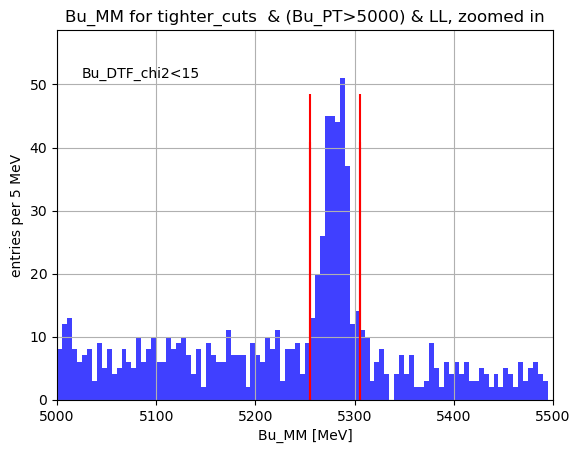

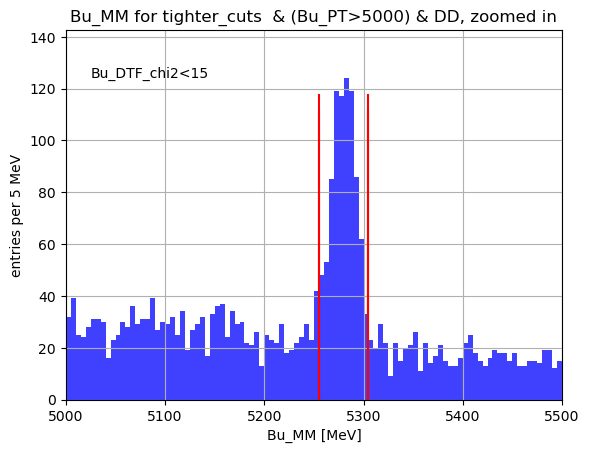

In [167]:
plt.title('Bu_MM for tighter_cuts  & (Bu_PT>5000) & LL, zoomed in')
nC, bins, patches = plt.hist(Lambda_corrected_mass[tighter_cuts& (Bu_PT>5000) & LL], bins=100, range=(5000,5500), color='b', alpha = 0.75)
plt.vlines(5305, 0., 0.95*max(nC), color='r')
plt.vlines(5255, 0., 0.95*max(nC), color='r')
plt.xlabel(r'Bu_MM [MeV]')
plt.ylabel('entries per 5 MeV')
plt.axis([5000,5500.,0,1.15*max(nC)])
plt.grid(True)
plt.vlines(5255., 0., 0.8*max(nC), color='red')
plt.vlines(5305., 0., 0.8*max(nC), color='red')
plt.annotate('Bu_DTF_chi2<15', xy=(0.05, 0.90), xycoords='axes fraction', fontsize=10, verticalalignment='top', horizontalalignment='left')
plt.show()

plt.title('Bu_MM for tighter_cuts  & (Bu_PT>5000) & DD, zoomed in')
nC, bins, patches = plt.hist(Lambda_corrected_mass[tighter_cuts & (Bu_PT>5000) & DD], bins=100, range=(5000,5500), color='b', alpha = 0.75)
plt.vlines(5305, 0., 0.95*max(nC), color='r')
plt.vlines(5255, 0., 0.95*max(nC), color='r')
plt.xlabel(r'Bu_MM [MeV]')
plt.ylabel('entries per 5 MeV')
plt.axis([5000,5500.,0,1.15*max(nC)])
plt.grid(True)
plt.vlines(5255., 0., 0.9*max(nC), color='red')
plt.vlines(5305., 0., 0.9*max(nC), color='red')
plt.annotate('Bu_DTF_chi2<15', xy=(0.05, 0.90), xycoords='axes fraction', fontsize=10, verticalalignment='top', horizontalalignment='left')

plt.show()

More exploration of the `Bu_MM` variable

In [159]:
B_region = (Bu_MM>5255.) & (Bu_MM<5305.)
prodProb_ppbar = np.multiply(p_ProbNNp,Lp_ProbNNp)

In [160]:
good_LambdaLL   = (Lp_ProbNNp>0.2) & (L0_MM>1111) & (L0_MM<1121) & good_Delta_Z & good_Lambda_chisq_100 & LL
good_LambdaDD   = (Lp_ProbNNp>0.2) & (L0_MM>1111) & (L0_MM<1121) & DD
good_Lambda     = good_LambdaLL | good_LambdaDD
good_prompt     = (Lp_ProbNNp>0.2) & (L0_FD_CHISQ<9) & LL
better_Lambda   = good_Lambda & (Bu_IPCHI2_OWNPV<6) 
better_LambdaLL = good_LambdaLL & (Bu_IPCHI2_OWNPV<6)
better_LambdaDD = good_LambdaDD & (Bu_IPCHI2_OWNPV<6)

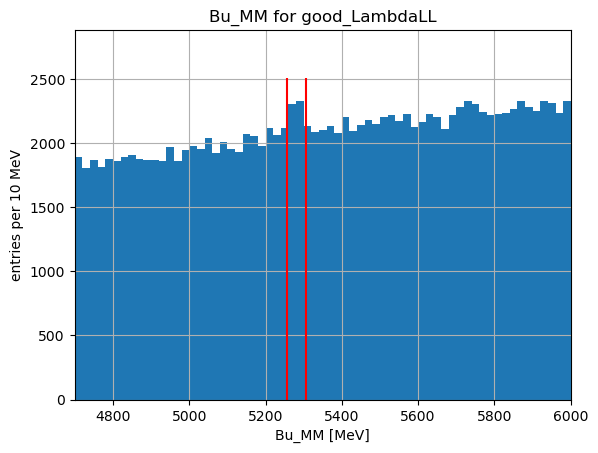

In [164]:
plt.figure()
plt.title('Bu_MM for good_LambdaLL')
nC, bins, patches = plt.hist(Bu_MM[good_LambdaLL], bins=100, range=(4500,6500))
plt.xlabel(r'Bu_MM [MeV]')
plt.ylabel('entries per 10 MeV')
plt.axis([4700,6000.,0,1.15*max(nC)])
plt.grid(True)
plt.vlines(5255., 0., 1.0*max(nC), color='red')
plt.vlines(5305., 0., 1.0*max(nC), color='red')
plt.show()

## Quick look into resonances

In [168]:
K1_4vec  = vector.awk({"x":h1_PX, "y":h1_PY, "z":h1_PZ, "t":h1_PE})
K2_4vec  = vector.awk({"x":h2_PX, "y":h2_PY, "z":h2_PZ, "t":h2_PE})
p_4vec   = vector.awk({"x":p_PX,  "y":p_PY,  "z":p_PZ,  "t":p_PE})
L0_4vec  = vector.awk({"x":L0_PX,  "y":L0_PY,  "z":L0_PZ,  "t":L0_PE})

KK_4vec  = K1_4vec+K2_4vec
pKK_4vec = p_4vec+KK_4vec 

LbarpKp_4vec = L0_4vec + p_4vec + K2_4vec  ## name is misleading (this is a Lbar,p,Km combo)

KK_mass  = np.sqrt(np.square(KK_4vec.t)  - np.square(KK_4vec.x)  - np.square(KK_4vec.y)  - np.square(KK_4vec.z))

pKK_mass = np.sqrt(np.square(pKK_4vec.t) - np.square(pKK_4vec.x) - np.square(pKK_4vec.y) - np.square(pKK_4vec.z))

LbarpKp_mass = np.sqrt(np.square(LbarpKp_4vec.t) - np.square(LbarpKp_4vec.x) - np.square(LbarpKp_4vec.y) - np.square(LbarpKp_4vec.z))

In [169]:
KK_alt_mass = KK_4vec.tau
mass_diff = KK_mass-KK_alt_mass
print('mass_diff = ',mass_diff)

mass_diff =  [1.36e-11, 0, 0, 0, 0, 0, ..., 2.96e-11, 0, 0, -5.68e-12, 5.23e-12, 0]


In [170]:
K1_4vec_p  = vector.awk({"px":h1_PX, "py":h1_PY, "pz":h1_PZ, "e":h1_PE})
K2_4vec_p  = vector.awk({"px":h2_PX, "py":h2_PY, "pz":h2_PZ, "e":h2_PE})

KKsum      = K1_4vec_p +  K2_4vec_p
KKsum_mass = KKsum.m

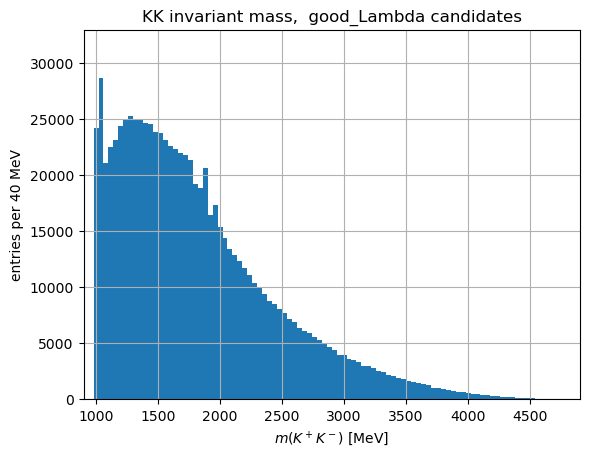

In [175]:
plt.figure()
plt.title('KK invariant mass,  good_Lambda candidates')
nC, bin, patches = plt.hist(KK_mass[good_Lambda], bins=100, range=(900.,4900.))
plt.xlabel(r'$ m(K^+ K^-) $ [MeV]')
plt.ylabel('entries per 40 MeV')
plt.axis([900.,4900.,0,1.15*max(nC)])
plt.grid(True)
plt.show()

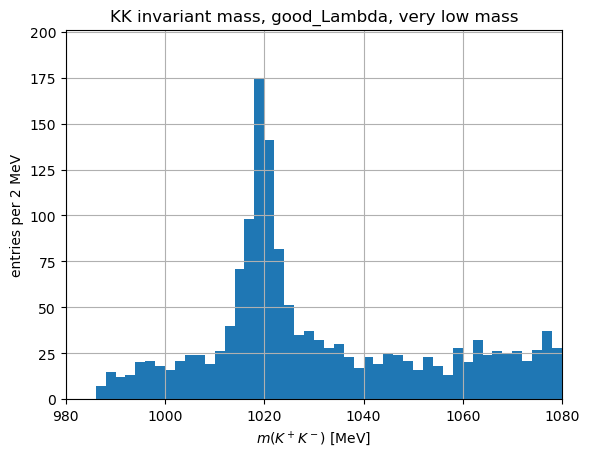

In [172]:
plt.title('KK invariant mass, good_Lambda, very low mass')
nC, bin, patches = plt.hist(KK_mass[good_Lambda & (KK_mass<1100) & B_region], bins=50, range=(980,1080))
plt.xlabel(r'$ m(K^+ K^-) $ [MeV]')
plt.ylabel('entries per 2 MeV')
plt.axis([980,1080,0,1.15*max(nC)])
plt.grid(True)
plt.show()

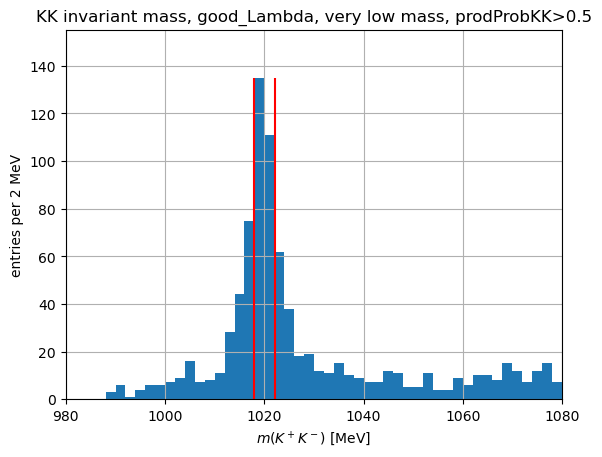

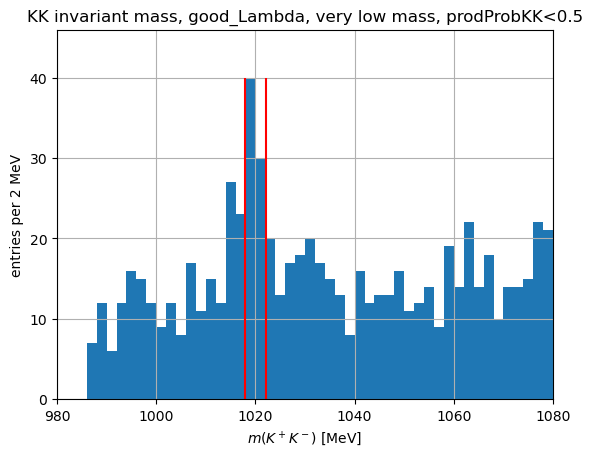

In [194]:
plt.title('KK invariant mass, good_Lambda, very low mass, prodProbKK>0.5')
nC, bin, patches = plt.hist(KK_mass[good_Lambda & (KK_mass<1100) & B_region & (prodProbKK>0.5)], bins=50, range=(980,1080))
plt.xlabel(r'$ m(K^+ K^-) $ [MeV]')
plt.ylabel('entries per 2 MeV')
plt.axis([980,1080,0,1.15*max(nC)])
plt.vlines(1017.87, 0., 1.0*max(nC), color='red')  # lower boundary
plt.vlines(1022.13, 0., 1.0*max(nC), color='red')  # upper boundary
plt.grid(True)
plt.show()

plt.title('KK invariant mass, good_Lambda, very low mass, prodProbKK<0.5')
nC, bin, patches = plt.hist(KK_mass[good_Lambda & (KK_mass<1100) & B_region & (prodProbKK<0.5)], bins=50, range=(980,1080))
plt.xlabel(r'$ m(K^+ K^-) $ [MeV]')
plt.ylabel('entries per 2 MeV')
plt.axis([980,1080,0,1.15*max(nC)])
plt.vlines(1017.87, 0., 1.0*max(nC), color='red')  # lower boundary
plt.vlines(1022.13, 0., 1.0*max(nC), color='red')  # upper boundary
plt.grid(True)
plt.show()

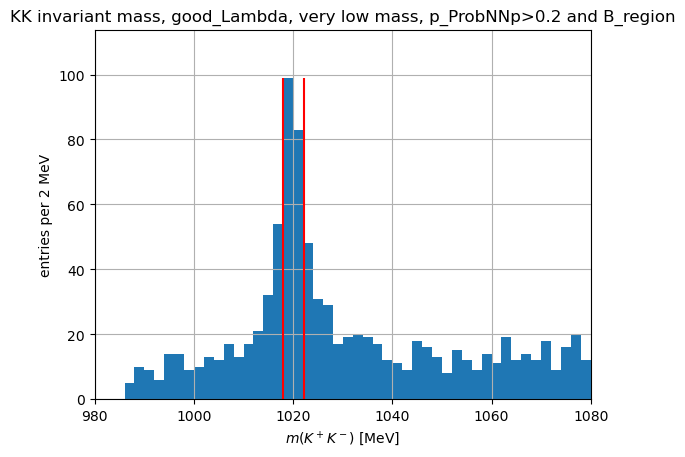

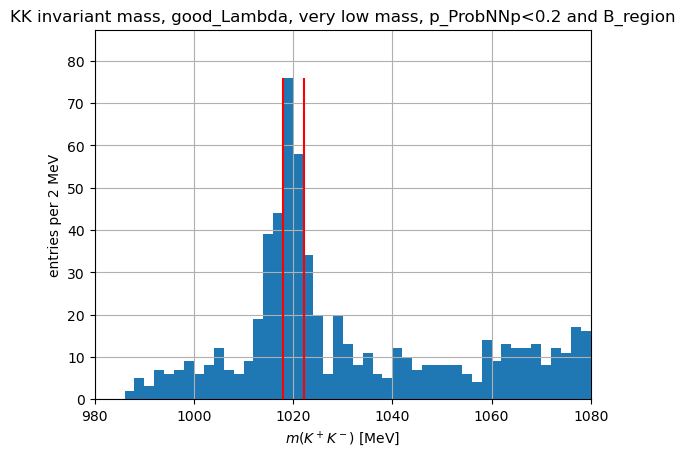

In [193]:
plt.title('KK invariant mass, good_Lambda, very low mass, p_ProbNNp>0.2 and B_region')
nC, bin, patches = plt.hist(KK_mass[good_Lambda & (KK_mass<1100) & B_region & (p_ProbNNp>0.2)], bins=50, range=(980,1080))
plt.xlabel(r'$ m(K^+ K^-) $ [MeV]')
plt.ylabel('entries per 2 MeV')
plt.axis([980,1080,0,1.15*max(nC)])
plt.vlines(1017.87, 0., 1.0*max(nC), color='red')  # lower boundary
plt.vlines(1022.13, 0., 1.0*max(nC), color='red')  # upper boundary
plt.grid(True)
plt.show()

plt.title('KK invariant mass, good_Lambda, very low mass, p_ProbNNp<0.2 and B_region')
nC, bin, patches = plt.hist(KK_mass[good_Lambda & (KK_mass<1100) & B_region & (p_ProbNNp<0.2)], bins=50, range=(980,1080))
plt.xlabel(r'$ m(K^+ K^-) $ [MeV]')
plt.ylabel('entries per 2 MeV')
plt.axis([980,1080,0,1.15*max(nC)])
plt.vlines(1017.87, 0., 1.0*max(nC), color='red')  # lower boundary
plt.vlines(1022.13, 0., 1.0*max(nC), color='red')  # upper boundary
plt.grid(True)
plt.show()

Now lets move into phi region

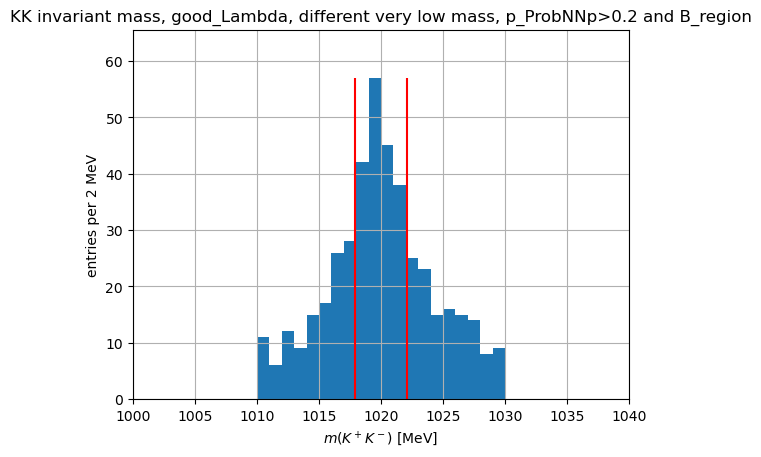

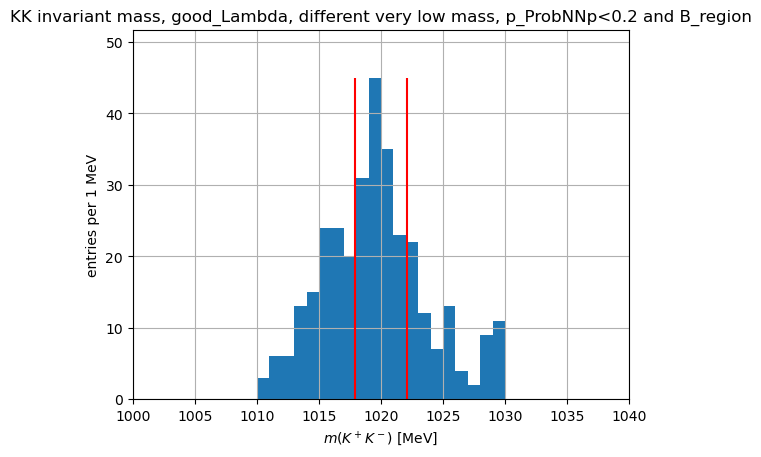

In [192]:
phi_region = (KK_mass > 1010) & (KK_mass < 1030)
plt.title('KK invariant mass, good_Lambda, different very low mass, p_ProbNNp>0.2 and B_region')
nC, bin, patches = plt.hist(KK_mass[good_Lambda & (KK_mass<1100) & B_region & (p_ProbNNp>0.2) & phi_region], bins=40, range=(1000,1040))
plt.xlabel(r'$ m(K^+ K^-) $ [MeV]')
plt.ylabel('entries per 2 MeV')
plt.axis([1000,1040,0,1.15*max(nC)])
plt.vlines(1017.87, 0., 1.0*max(nC), color='red')  # lower boundary
plt.vlines(1022.13, 0., 1.0*max(nC), color='red')  # upper boundary
plt.grid(True)
plt.show()

plt.title('KK invariant mass, good_Lambda, different very low mass, p_ProbNNp<0.2 and B_region')
nC, bin, patches = plt.hist(KK_mass[good_Lambda & (KK_mass<1100) & B_region & (p_ProbNNp<0.2) & phi_region], bins=40, range=(1000,1040))
plt.xlabel(r'$ m(K^+ K^-) $ [MeV]')
plt.ylabel('entries per 1 MeV')
plt.axis([1000,1040,0,1.15*max(nC)])
plt.vlines(1017.87, 0., 1.0*max(nC), color='red')  # lower boundary
plt.vlines(1022.13, 0., 1.0*max(nC), color='red')  # upper boundary
plt.grid(True)
plt.show()